<a href="https://colab.research.google.com/github/bolps/vdm2020/blob/master/Progetto_VDM_Sport_e_alimentazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Consegna e link utili

**Consegna del progetto:**

1. Costruzione del sottoinsieme dei dati che contenga le informazioni assegnate al gruppo;
2. Analisi monovariata e visualizzazione monovariata dei dati del proprio dataset;
3. Analisi bivariata e visualizzazione dei dati piu’ interessanti ai fini degli obiettivi di ricerca;
4. Analisi multivariata e visualizzazione dei dati complessi.

**Link utili** <br>
http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/114-mca-multiple-correspondence-analysis-in-r-essentials/ <br>
http://www.gastonsanchez.com/visually-enforced/how-to/2012/10/13/MCA-in-R/ <br>
https://datascienceplus.com/using-mca-and-variable-clustering-in-r-for-insights-in-customer-attrition/ <br>
https://datascienceplus.com/using-mca-and-variable-clustering-in-r-for-insights-in-customer-attrition/

#### **TODO**
- [x] Rifare bivariate con nuove variabili
- [x] Togliere SPRIV e REGMF
- [x] Bozza multivariate
- [x] Fix visalizzazione warning in output su github
- [ ] Bozza commenti scelte fatte (processo) *fuffa*
- [ ] Bozza risultati(processo) *fuffa*
- [x] Valutare possibile ricodifica di FREQSPO e ISTRMi
- [ ] ggplot su pie ... portare fuori le etichette
- [ ] Aggiungere table su bivariate se non si può N a mosaic
- [ ] Aggiungere n a mosiaci, si può? e si legge?
- [ ] Quando nel table c'è inferiroe a 5 esiste un altro test? (bivariate risec)
- [ ] Grafico cos2 corrispondenza
- [ ] Approfondire analisi corrispondenza

Abstract
<br>
Introduzione
<br>
Domanda di ricerca
<br>
Dataset e metodi
<br>
Presentazione analisi mono
<br>
Presentazione analisi e risultati bivariate
<br>
Presentazione analisi multivariate e risultati
<br>
Conclusione



#### Contesto e domanda di ricerca

**Domanda di ricerca** <br>

Indagare il legame tra le abitudini sportive, le risorse economiche, l'area geografica e gli indici di salute oggettivi (*Body Mass Index*) e soggettivi (*Salute percepita*) nei 18-35enni residenti in italia, con un focus particolare sul genere.
<br><br>
**Informazioni sulle variabili e sulla codifica**<br>
Per informazioni sulle variabili e sulla loro codifica consultare il tracciato disponibile
<a href="http://pizzaplanet.epizy.com/vdm/METADATI/AVQ_Tracciato_2018.html"> qui </a>

#### Installazione librerie

In [3]:
options(warn=-1)

In [4]:
# TEMPO DI INSTALLAZIONE STIMATO: 4 MINUTI
list.of.packages <- c("RCurl","readr","ggplot2", "RColorBrewer","graphics","vcd","FactoMineR","factoextra")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘corrplot’, ‘zoo’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘bitops’, ‘lmtest’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggrepel’, ‘abind’, ‘dendextend’, ‘ggpubr’, ‘reshape2’




#### Download e caricamento del dataset

In [5]:
library(RCurl)
download.file("https://raw.githubusercontent.com/bolps/dataset/master/AVQ_Microdati_2018.txt", "AVQ_Microdati_2018.txt")

In [67]:
library(readr)
AVQ_Microdati_2018 <- read_delim(
  "AVQ_Microdati_2018.txt",
  "\t",
  escape_double=FALSE,
  na="NA",
  trim_ws=TRUE,
  col_types = cols(
    'REACQ3'=col_double(),'REACQ5'=col_double(),
    'NODELE'=col_double(),'NOSPO6'=col_double(),
    'ORARIS'=col_double(),'NOMED' =col_double(),
    'CONASS'=col_double(),'MALAT' =col_double(),
    'ABBAND'=col_double(),'NONVUO'=col_double()
  )
)

##### Estrazione delle varabili, ricodifica e fix vari


In [68]:
AVQ18.sport <- AVQ_Microdati_2018[AVQ_Microdati_2018$ETAMi>='007'&AVQ_Microdati_2018$ETAMi<='009',c(
  'ETAMi','SESSO','CITTMi','STCIVMi','ISTRMi','CONDMi','RISEC', 'REGMF', 'RIPMF',
  'SPOCON', 'SPOSAL', 'ATTFIS','FREQSPO', 'SPRIV', #spocon, sposal, attfis -> sport
  'AMBIENTE','TEMLIB','SALUT','BMI')]

In [69]:
# Verifico la struttura del dataset selezionato
str(AVQ18.sport)

tibble [7,372 × 18] (S3: tbl_df/tbl/data.frame)
 $ ETAMi   : chr [1:7372] "008" "009" "008" "008" ...
 $ SESSO   : num [1:7372] 1 2 1 2 2 2 1 1 2 2 ...
 $ CITTMi  : num [1:7372] 1 1 1 1 1 1 3 1 1 1 ...
 $ STCIVMi : num [1:7372] 1 1 1 1 1 1 1 1 1 1 ...
 $ ISTRMi  : chr [1:7372] "07" "01" "07" "01" ...
 $ CONDMi  : num [1:7372] 2 1 1 1 1 3 1 1 3 3 ...
 $ RISEC   : num [1:7372] 2 2 2 2 2 3 2 2 3 3 ...
 $ REGMF   : chr [1:7372] "070" "070" "070" "070" ...
 $ RIPMF   : num [1:7372] 1 1 1 1 1 1 3 3 3 3 ...
 $ SPOCON  : num [1:7372] 1 2 2 2 1 1 1 2 1 2 ...
 $ SPOSAL  : num [1:7372] 1 NA NA NA 2 1 1 NA 1 NA ...
 $ ATTFIS  : num [1:7372] 1 NA NA NA NA 2 3 NA 1 NA ...
 $ FREQSPO : num [1:7372] NA 3 1 2 3 NA NA 4 NA NA ...
 $ SPRIV   : num [1:7372] NA 1 1 2 2 NA NA 1 NA 1 ...
 $ AMBIENTE: num [1:7372] 3 2 2 2 3 3 2 3 1 1 ...
 $ TEMLIB  : num [1:7372] 3 1 2 2 2 3 2 1 2 2 ...
 $ SALUT   : num [1:7372] 3 1 2 1 2 3 2 2 2 2 ...
 $ BMI     : num [1:7372] 2 2 2 2 1 2 2 2 2 2 ...


In [70]:
# Trasformo la tipologia delle variabili in linea con quanto indicato nel tracciato
for (i in 1:length(AVQ18.sport))
  AVQ18.sport[[i]]<-as.factor(AVQ18.sport[[i]])

In [71]:
# Assegno l'etichetta corrispondente ai livelli delle variabili
# Per uniformare il dataset l'opzione 'non disponibile' è stata ricodificata come NA

levels(AVQ18.sport$ETAMi) <- c(
    "18-19 anni", 
    "20-24 anni", 
    "25-34 anni"
)

levels(AVQ18.sport$SESSO) <- c(
    "maschio",
    "femmina"
)

levels(AVQ18.sport$CITTMi) <- c(
    "italiana",
    "straniera",
    NA
)

levels(AVQ18.sport$STCIVMi) <- c(
    "celibe/nubile",
    "coniugato/unito civilmente",
    "separato/divorziato",
    "vedovo",
    NA
)

levels(AVQ18.sport$ISTRMi) <- c(
    "laurea e post-laurea"
    ,"diploma"
    ,"scuola media/elementare/nessuno"
    ,"scuola media/elementare/nessuno",
    NA
)

levels(AVQ18.sport$CONDMi) <- c(
    "occupato",
    "in cerca di occupazione",
    "inattivo; altra condizione",
    NA
)

levels(AVQ18.sport$RISEC) <- c(
    "ottime",
    "adeguate",
    "scarse",
    "assolutamente insufficienti"
)

# Per pulire i livelli della variabile e eliminare ridondanza con la variabile RIPMF, "Nord-ovest", "Nord-est", "Centro", "Sud", "Isole" sono state ricodificate come NA
levels(AVQ18.sport$REGMF) <- c(
    "Piemonte",
    "Valle d'Aosta",
    "Lombardia",
    "Trentino-Alto Adige",
    "Veneto",
    "Friuli-Venezia Giulia",
    "Liguria",
    "Emilia-Romagna",
    "Toscana",
    "Umbria",
    "Marche",
    "Lazio",
    "Abruzzo", 
    "Molise", 
    "Campania", 
    "Puglia", 
    "Basilicata", 
    "Calabria", 
    "Sicilia", 
    "Sardegna", 
    NA, 
    NA, 
    NA, 
    NA, 
    NA, 
    NA
)

levels(AVQ18.sport$RIPMF) <- c(
    "Nord-ovest",
    "Nord-est",
    "Centro",
    "Sud",
    "Isole",
    NA
)

for (i in c("SPOCON", "SPOSAL"))
    levels(AVQ18.sport[[i]])<- c(
      "no", 
      "si"
    )

levels(AVQ18.sport$ATTFIS) <- c(
    "no",
    "si, una o più volte a settimana",
    "si, una o più volte al mese",
    "si, più raramente"
)

levels(AVQ18.sport$FREQSPO) <- c(
    "alta",
    "alta",
    "media",
    "media",
    "bassa",
    "bassa",
    "bassa"
)

levels(AVQ18.sport$AMBIENTE) <- c(
    "molto",
    "abbastanza",
    "poco",
    "per niente"
)

levels(AVQ18.sport$SPRIV) <- c(
    "no",
    "si"
)

for (i in c("AMBIENTE", "TEMLIB"))
    levels(AVQ18.sport[[i]])<- c(
        "molto",
        "abbastanza",
        "poco",
        "per niente"
    )

levels(AVQ18.sport$SALUT) <- c(
    "molto", 
    "abbastanza", 
    "poco/per niente", 
    "poco/per niente"
)

levels(AVQ18.sport$BMI) <- c(
    "sottopeso", 
    "normopeso", 
    "sovrappeso", 
    "obeso"
)

In [72]:
AVQ18.sport$SPORT <- ifelse(AVQ18.sport$SPOCON=="si", "sport continuativo", 
                             ifelse(AVQ18.sport$SPOSAL=="si", "sport saltuario", 
                               ifelse(AVQ18.sport$ATTFIS=="si, una o più volte a settimana", "attività fisica continuativa",
                                 ifelse(AVQ18.sport$ATTFIS=="si, una o più volte al mese" | AVQ18.sport$ATTFIS=="si, più raramente", "attività fisica saltuaria", 
                                    ifelse(AVQ18.sport$ATTFIS=="no", "nessuna attività", NA)))))
                                    
AVQ18.sport$SPORT <- as.factor(AVQ18.sport$SPORT)
AVQ18.sport$SPORT <- factor(AVQ18.sport$SPORT,levels(AVQ18.sport$SPORT)[c(4,5,1,2,3)])

In [73]:
AVQ18.sport <- AVQ18.sport[,c(
  'ETAMi','SESSO','CITTMi','STCIVMi','ISTRMi','CONDMi','RISEC', 'RIPMF',
  'SPORT','FREQSPO',
  'SALUT','BMI')]

In [74]:
# Visualizzo la struttura del dataset per verificare le modifiche applicate
str(AVQ18.sport)

tibble [7,372 × 12] (S3: tbl_df/tbl/data.frame)
 $ ETAMi  : Factor w/ 3 levels "18-19 anni","20-24 anni",..: 2 3 2 2 3 1 2 3 3 3 ...
 $ SESSO  : Factor w/ 2 levels "maschio","femmina": 1 2 1 2 2 2 1 1 2 2 ...
 $ CITTMi : Factor w/ 2 levels "italiana","straniera": 1 1 1 1 1 1 2 1 1 1 ...
 $ STCIVMi: Factor w/ 4 levels "celibe/nubile",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ISTRMi : Factor w/ 3 levels "laurea e post-laurea",..: 2 1 2 1 1 2 2 1 2 2 ...
 $ CONDMi : Factor w/ 3 levels "occupato","in cerca di occupazione",..: 2 1 1 1 1 3 1 1 3 3 ...
 $ RISEC  : Factor w/ 4 levels "ottime","adeguate",..: 2 2 2 2 2 3 2 2 3 3 ...
 $ RIPMF  : Factor w/ 5 levels "Nord-ovest","Nord-est",..: 1 1 1 1 1 1 3 3 3 3 ...
 $ SPORT  : Factor w/ 5 levels "sport continuativo",..: 5 1 1 1 2 3 4 1 5 1 ...
 $ FREQSPO: Factor w/ 3 levels "alta","media",..: NA 2 1 1 2 NA NA 2 NA NA ...
 $ SALUT  : Factor w/ 3 levels "molto","abbastanza",..: 3 1 2 1 2 3 2 2 2 2 ...
 $ BMI    : Factor w/ 4 levels "sottopeso","normopeso",..:

#### Analisi monovariata // Summary per macrocategoria di variabili

In [28]:
# Visualizzo summary delle variabili socio-demografiche
summary(AVQ18.sport[,c('ETAMi','SESSO','CITTMi','STCIVMi','ISTRMi','CONDMi','RISEC', 'RIPMF')])

        ETAMi          SESSO            CITTMi    
 18-19 anni: 811   maschio:3716   italiana :6758  
 20-24 anni:2056   femmina:3656   straniera: 428  
 25-34 anni:4505                  NA's     : 186  
                                                  
                                                  
                                                  
                       STCIVMi                                 ISTRMi    
 celibe/nubile             :5960   laurea e post-laurea           :1595  
 coniugato/unito civilmente:1112   diploma                        :4026  
 separato/divorziato       : 128   scuola media/elementare/nessuno:1553  
 vedovo                    : 172   NA's                           : 198  
                                                                         
                                                                         
                        CONDMi                             RISEC     
 occupato                  :3489   ottime              

In [ ]:
# Visualizzo il summary delle variabili relative allo sport e all'attività fisica
summary(AVQ18.sport[,c('SPORT','FREQSPO')])

                          SPORT                                 FREQSPO    
 sport continuativo          :2740   due volte a settimana          :1343  
 sport saltuario             :1074   tre o quattro volte a settimana:1082  
 attività fisica continuativa: 883   una volta a settimana          : 539  
 attività fisica saltuaria   :1056   due o tre volte al mese        : 339  
 nessuna attività            :1528   cinque o più volte a settimana : 282  
 NA's                        :  91   (Other)                        : 225  
                                     NA's                           :3562  

In [ ]:
# Visualizzo il summary relativo a BMI, stato di salute percepita e soddisfazione per il tempo libero
summary(AVQ18.sport[,c('SALUT','BMI')])

        SALUT              BMI      
 molto     :2091   sottopeso : 518  
 abbastanza:4682   normopeso :4941  
 poco      : 408   sovrappeso:1574  
 per niente:  88   obeso     : 339  
 NA's      : 103                    

#### Analisi monovariata // Variabili socio-demografiche



In [ ]:
library(RColorBrewer)
library(ggplot2)

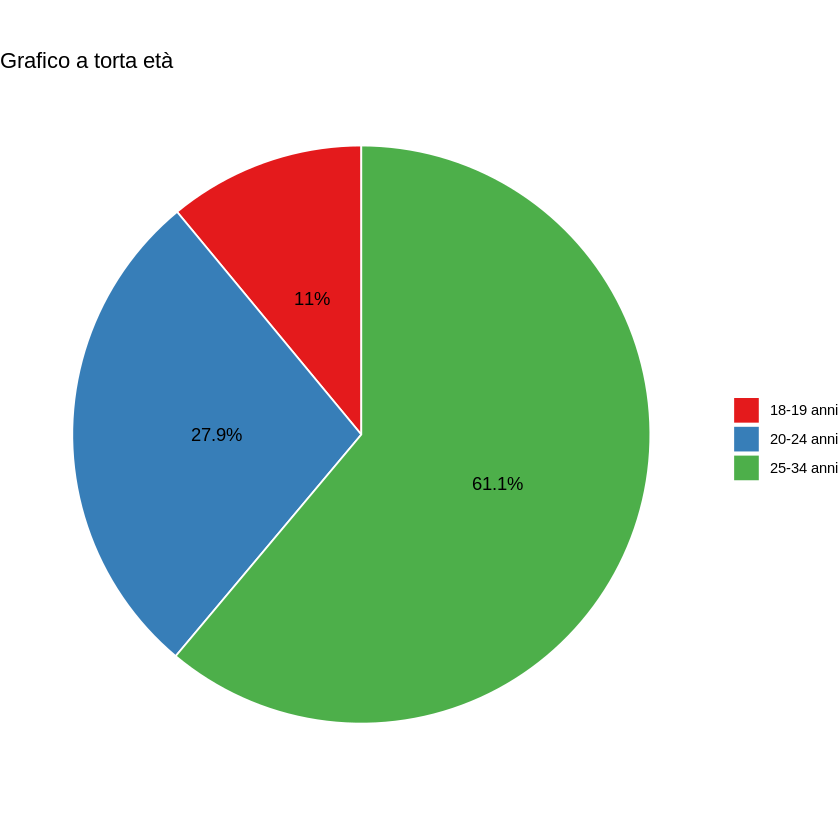

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$ETAMi),
                   "values" =round(as.vector(table(AVQ18.sport$ETAMi))/sum(as.vector(table(AVQ18.sport$ETAMi)))*100,1))

ggplot(data, aes(x="", y=values, fill=class)) +
coord_polar("y", start=0) +
geom_bar(stat="identity", width=1, color="white") +
geom_text(aes(label = paste0(values, "%")), position = position_stack(vjust = 0.5)) +
labs(x = NULL, y = NULL, fill = NULL, title = "Grafico a torta età")+
scale_fill_brewer(palette="Set1")+
theme_void()

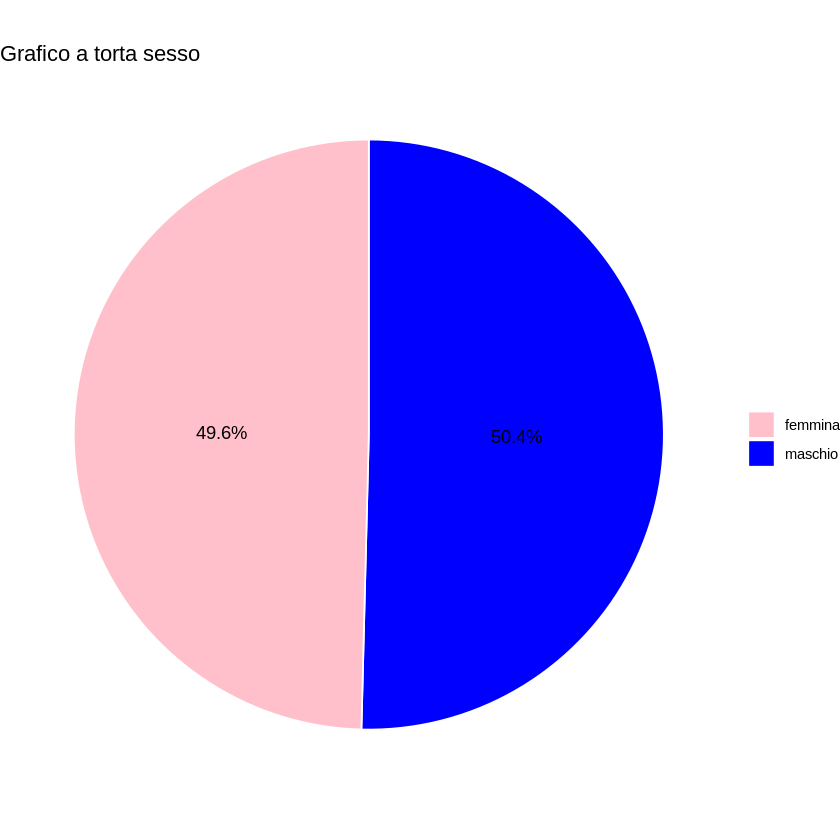

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$SESSO),
                   "values" =round(as.vector(table(AVQ18.sport$SESSO))/sum(as.vector(table(AVQ18.sport$SESSO)))*100,1))

ggplot(data, aes(x="", y=values, fill=class)) +
coord_polar("y", start=0) +
geom_bar(stat="identity", width=1, color="white") +
geom_text(aes(label = paste0(values, "%")), position = position_stack(vjust = 0.5)) +
labs(x = NULL, y = NULL, fill = NULL, title = "Grafico a torta sesso")+
scale_fill_manual( values=c("pink", "blue"))+
theme_void()

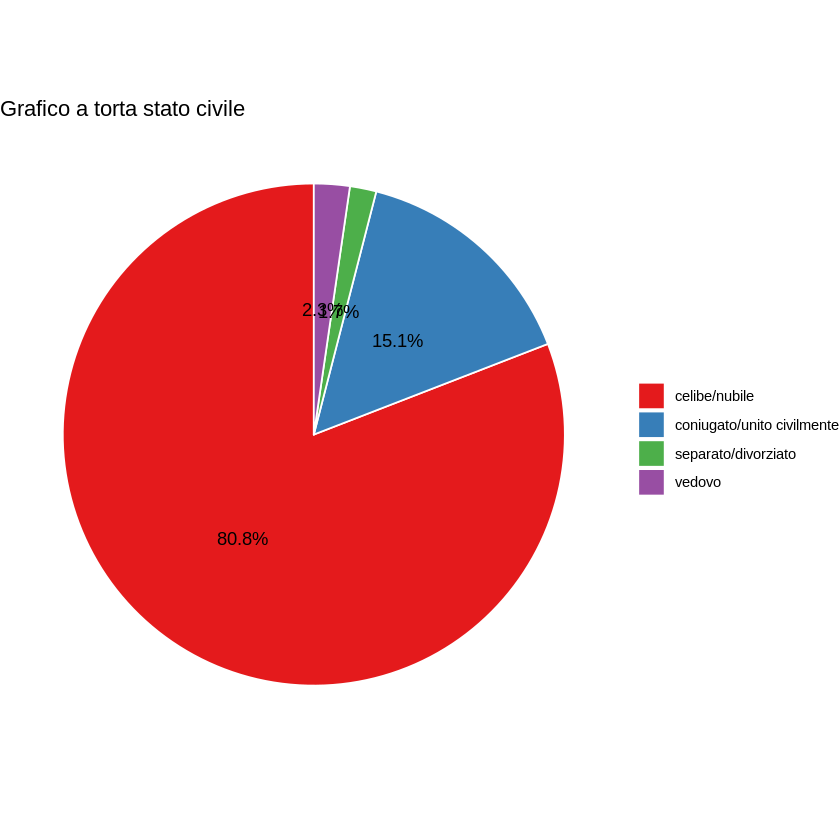

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$STCIVMi),
                   "values" =round(as.vector(table(AVQ18.sport$STCIVMi))/sum(as.vector(table(AVQ18.sport$STCIVMi)))*100,1))

ggplot(data, aes(x="", y=values, fill=class)) +
coord_polar("y", start=0) +
geom_bar(stat="identity", width=1, color="white") +
geom_text(aes(label = paste0(values, "%")), position = position_stack(vjust = 0.5)) +
labs(x = NULL, y = NULL, fill = NULL, title = "Grafico a torta stato civile")+
scale_fill_brewer(palette="Set1")+
theme_void()

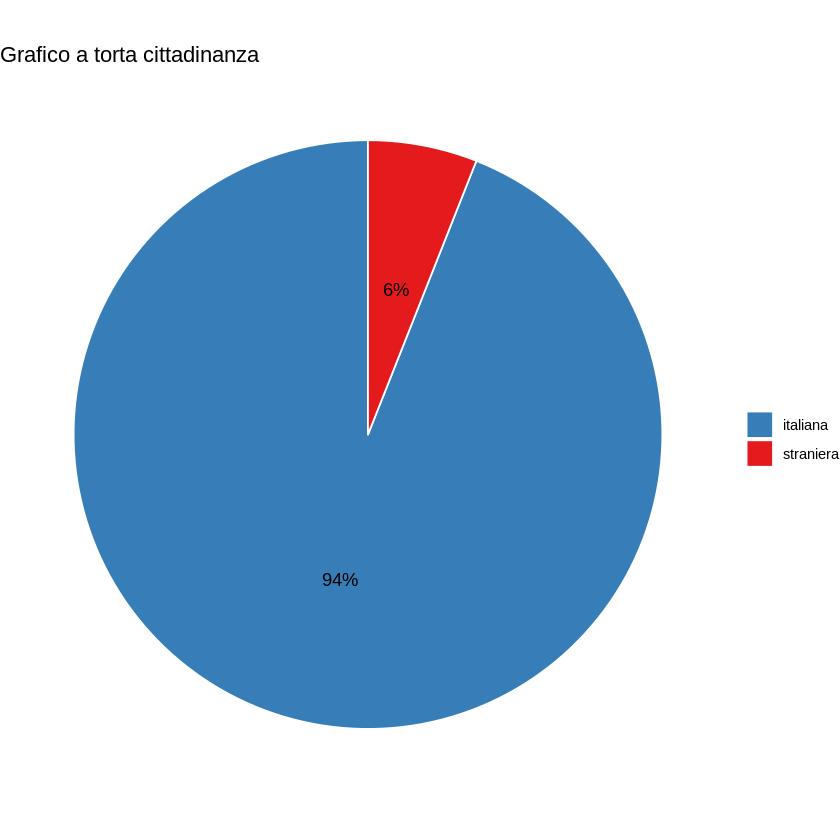

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$CITTMi),
                   "values" =round(as.vector(table(AVQ18.sport$CITTMi))/sum(as.vector(table(AVQ18.sport$CITTMi)))*100,1))

ggplot(data, aes(x="", y=values, fill=class)) +
coord_polar("y", start=0) +
geom_bar(stat="identity", width=1, color="white") +
geom_text(aes(label = paste0(values, "%")), position = position_stack(vjust = 0.5)) +
labs(x = NULL, y = NULL, fill = NULL, title = "Grafico a torta cittadinanza")+
scale_fill_brewer(palette="Set1", direction=-1)+
theme_void()

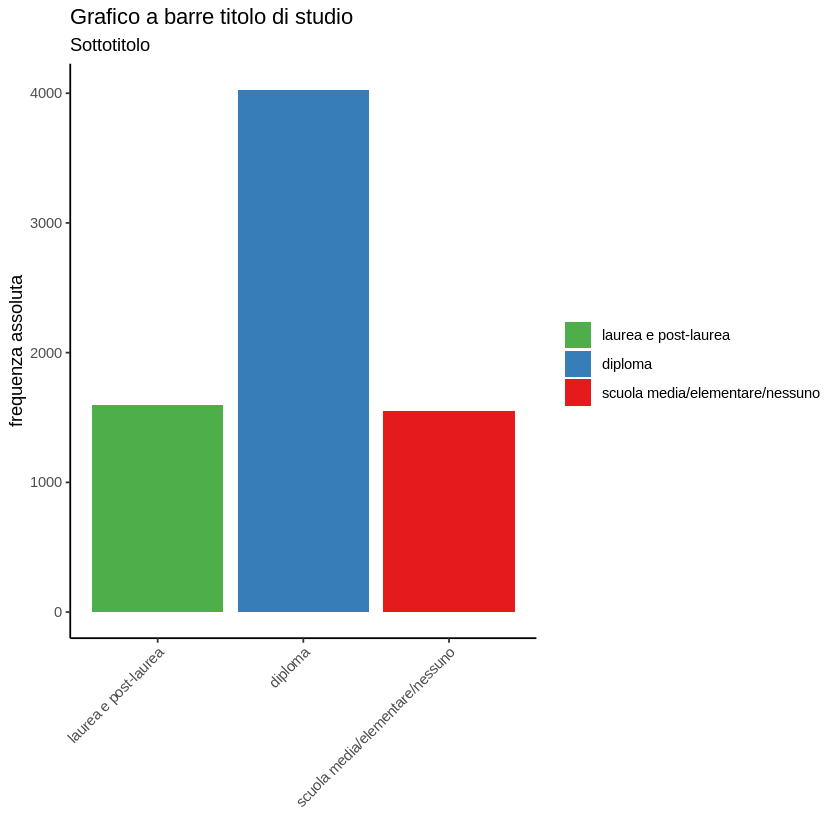

In [27]:
data <- data.frame("class" = levels(AVQ18.sport$ISTRMi),
                   "values" =as.vector(table(AVQ18.sport$ISTRMi)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre titolo di studio", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="Set1", direction=-1)

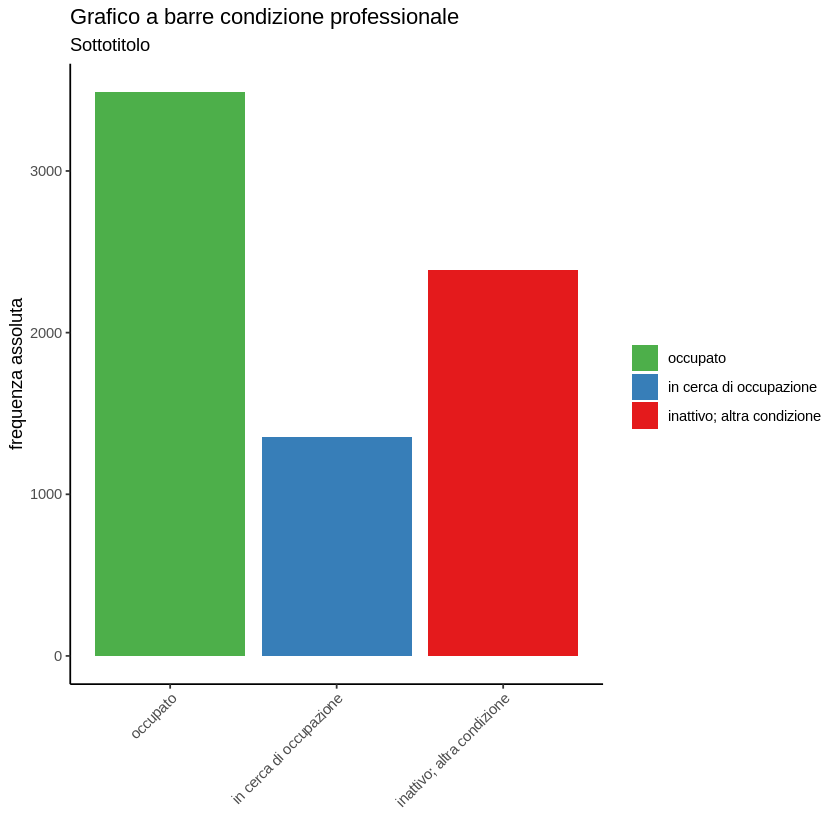

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$CONDMi),
                   "values" =as.vector(table(AVQ18.sport$CONDMi)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre condizione professionale", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="Set1", direction=-1)

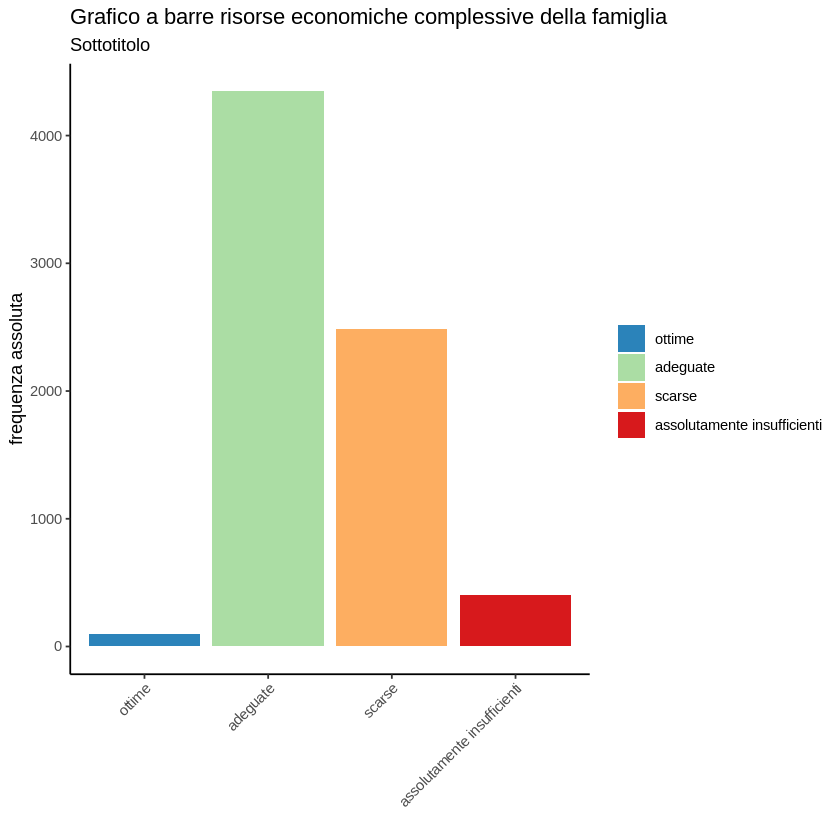

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$RISEC),
                   "values" =as.vector(table(AVQ18.sport$RISEC)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre risorse economiche complessive della famiglia", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="Spectral", direction=-1)

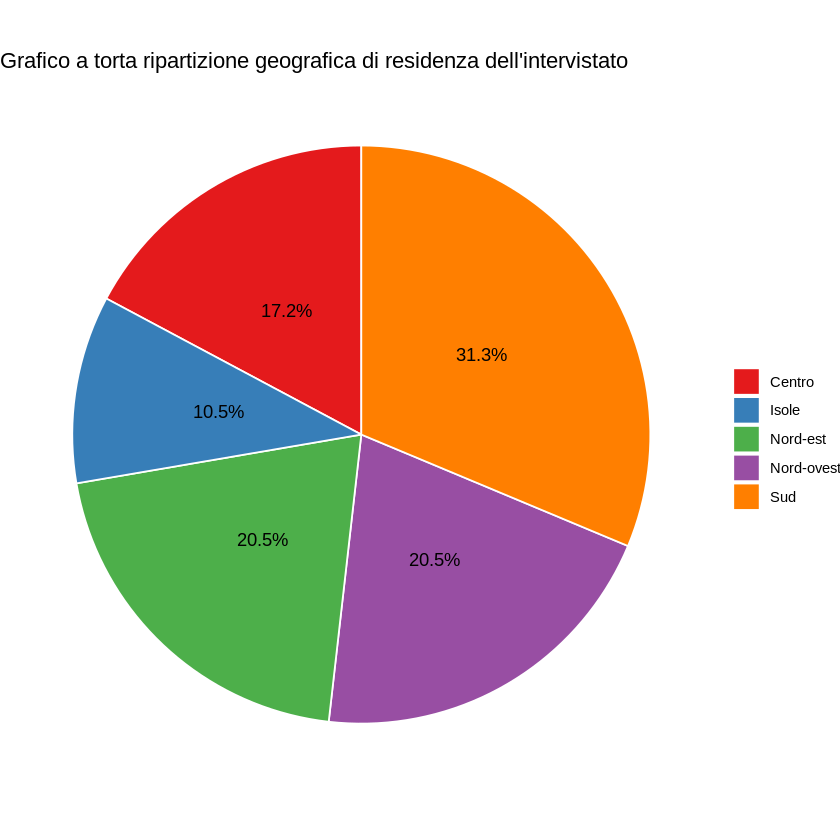

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$RIPMF),
                   "values" =round(as.vector(table(AVQ18.sport$RIPMF))/sum(as.vector(table(AVQ18.sport$RIPMF)))*100,1))

ggplot(data, aes(x="", y=values, fill=class)) +
coord_polar("y", start=0) +
geom_bar(stat="identity", width=1, color="white") +
geom_text(aes(label = paste0(values, "%")), position = position_stack(vjust = 0.5)) +
labs(x = NULL, y = NULL, fill = NULL, title = "Grafico a torta ripartizione geografica di residenza dell'intervistato")+
scale_fill_brewer(palette="Set1")+
theme_void()

#### Analisi monovariata // Variabili sport e attività fisica

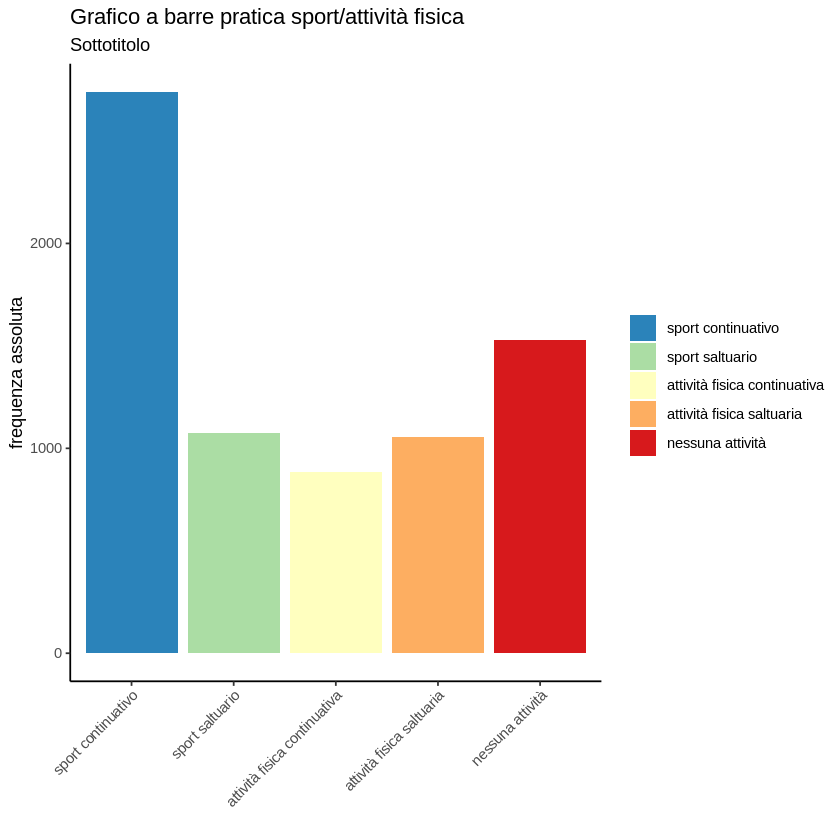

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$SPORT),
                   "values" =as.vector(table(AVQ18.sport$SPORT)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre pratica sport/attività fisica", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="Spectral", direction=-1)

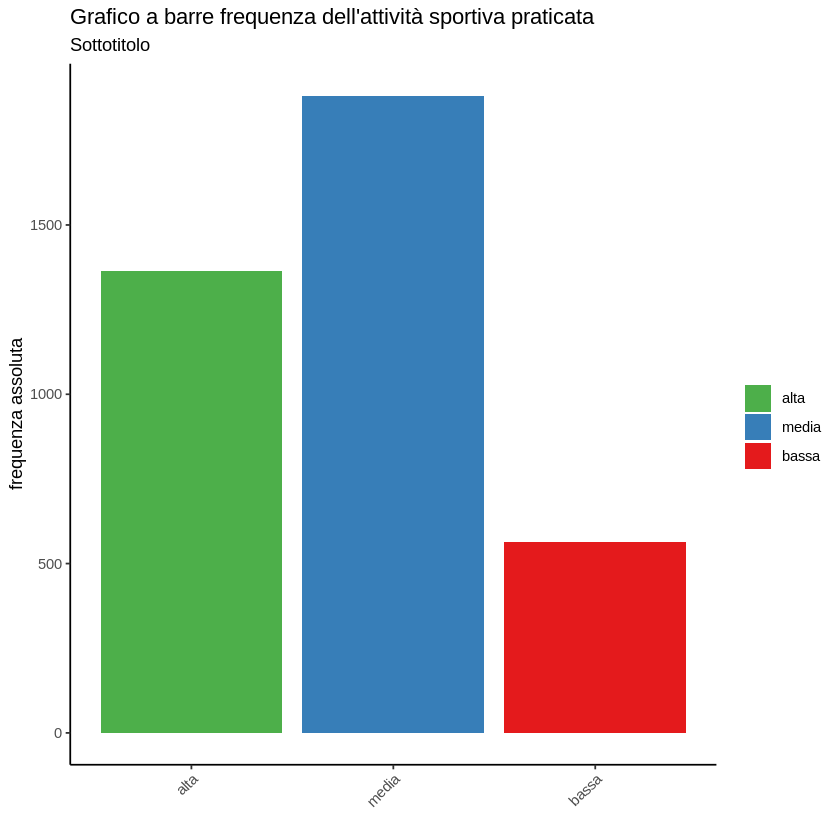

In [60]:
data <- data.frame("class" = levels(AVQ18.sport$FREQSPO),
                   "values" =as.vector(table(AVQ18.sport$FREQSPO)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre frequenza dell'attività sportiva praticata", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="Set1", direction=-1)

#### Analisi monovariata // Variabili BMI, salute percepita e soddisfazione per il tempo libero

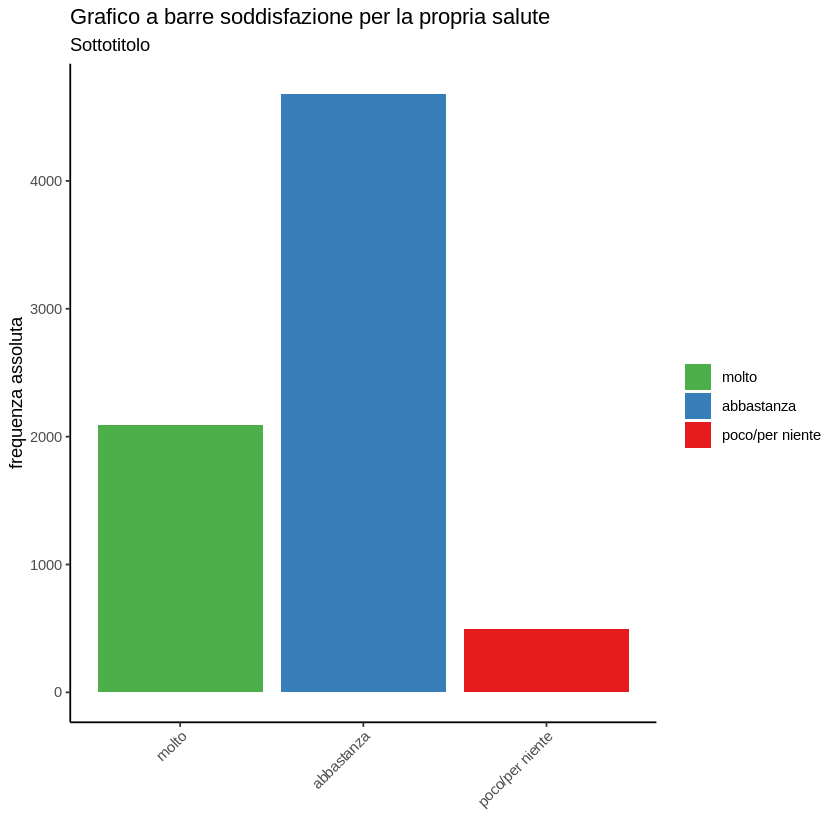

In [76]:
data <- data.frame("class" = levels(AVQ18.sport$SALUT),
                   "values" =as.vector(table(AVQ18.sport$SALUT)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre soddisfazione per la propria salute", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="Set1", direction=-1)

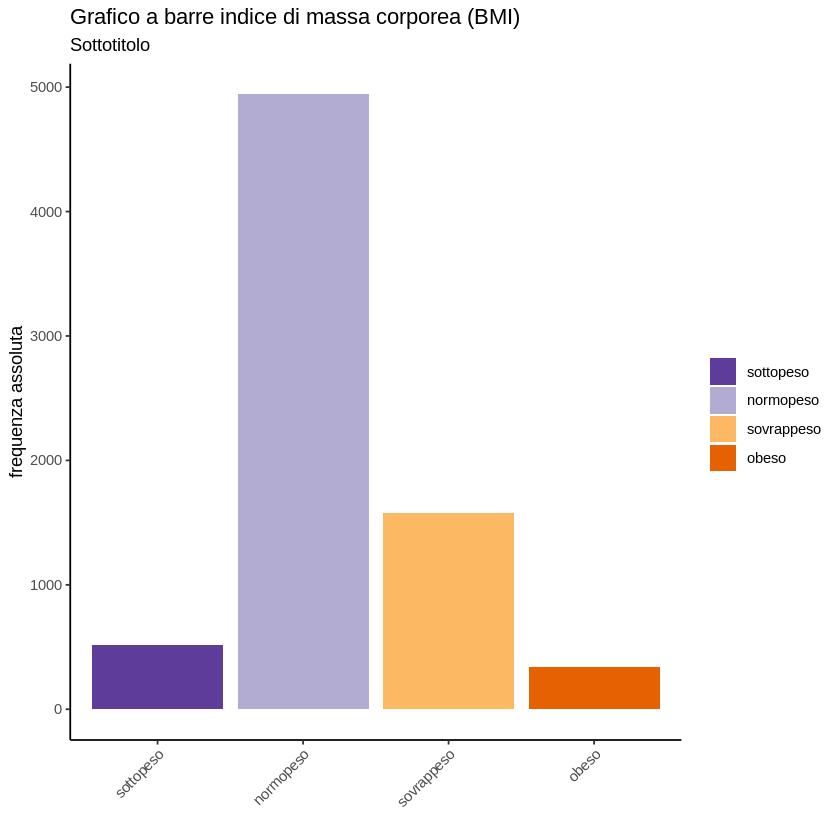

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$BMI),
                   "values" =as.vector(table(AVQ18.sport$BMI)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre indice di massa corporea (BMI)", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="PuOr", direction=-1)

#### Bivariata // Focus Sport

In [30]:
library(vcd)

Loading required package: grid



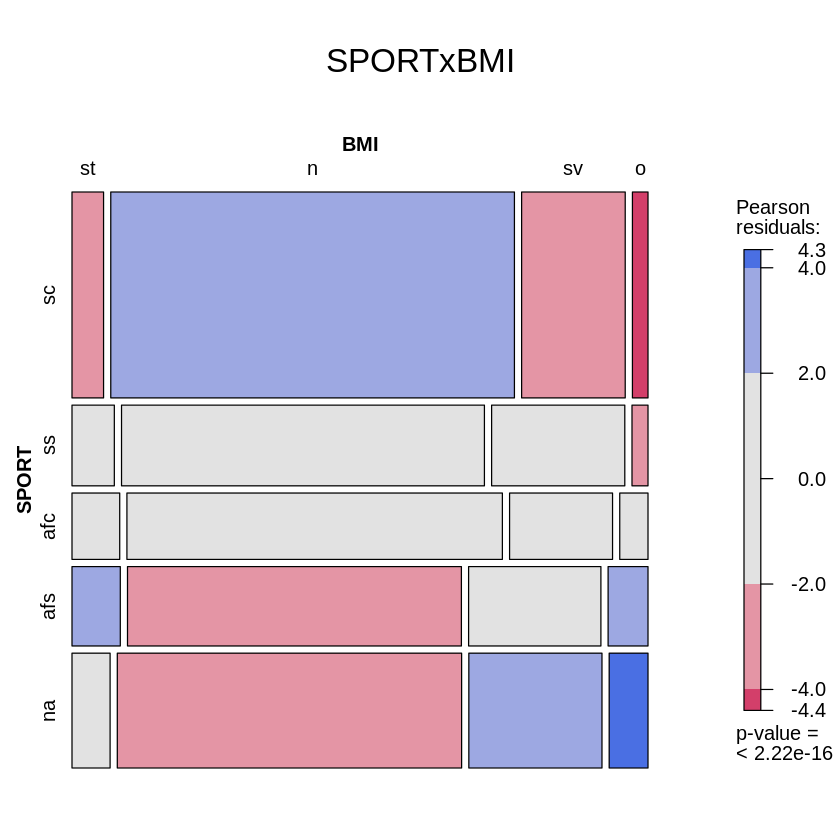

In [105]:
mosaic(~ SPORT + BMI, data = AVQ18.sport, main = "SPORTxBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T)

In [82]:
table(AVQ18.sport$SPORT,AVQ18.sport$SALUT)

                              
                               molto abbastanza poco/per niente
  sport continuativo             932       1651             126
  sport saltuario                298        693              69
  attività fisica continuativa   226        575              66
  attività fisica saltuaria      256        697              95
  nessuna attività               353       1011             134

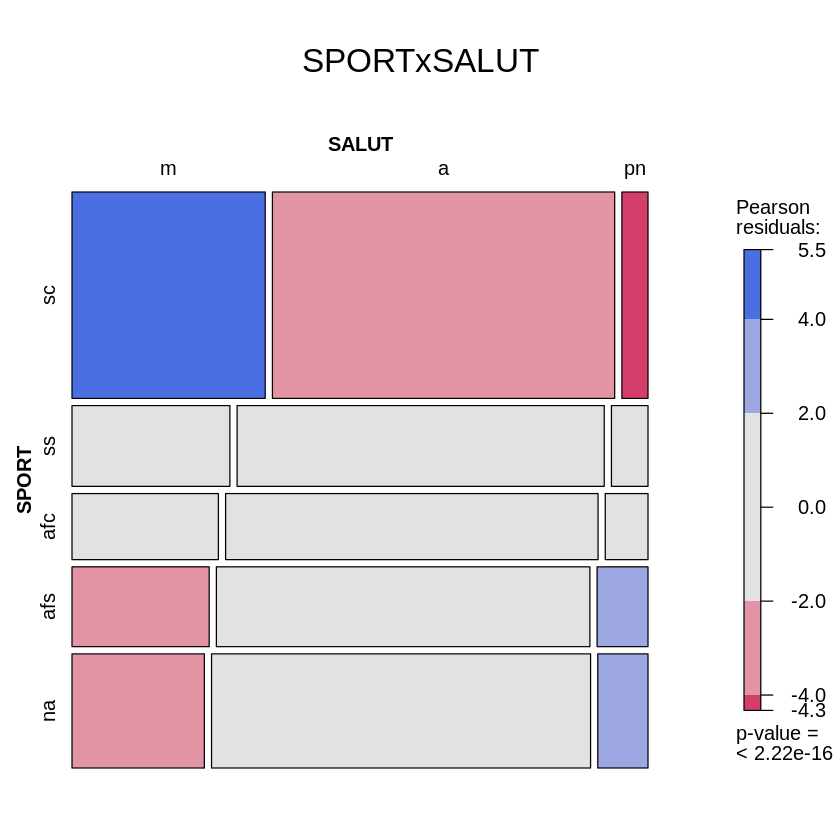

In [81]:
mosaic(~ SPORT + SALUT, data = AVQ18.sport, main = "SPORTxSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T)

In [80]:
table(AVQ18.sport$FREQSPO,AVQ18.sport$BMI)

       
        sottopeso normopeso sovrappeso obeso
  alta         60      1024        245    35
  media       129      1311        386    56
  bassa        49       359        139    17

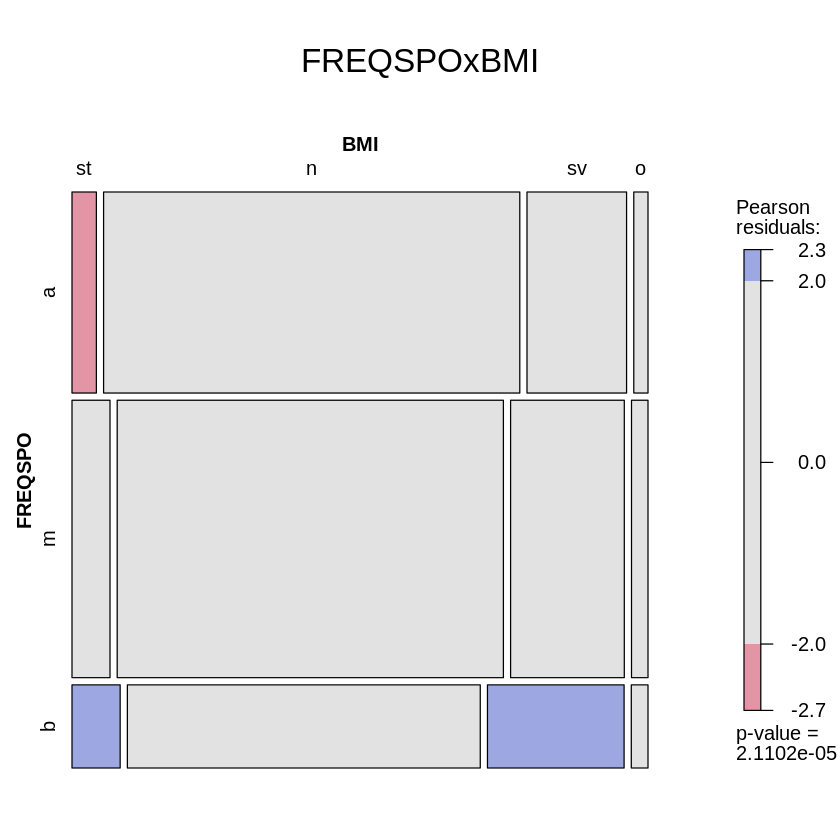

In [79]:
mosaic(~ FREQSPO + BMI, data = AVQ18.sport, main = "FREQSPOxBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T)

In [77]:
table(AVQ18.sport$FREQSPO,AVQ18.sport$SALUT)

       
        molto abbastanza poco/per niente
  alta    519        765              63
  media   547       1213             102
  bassa   161        365              30

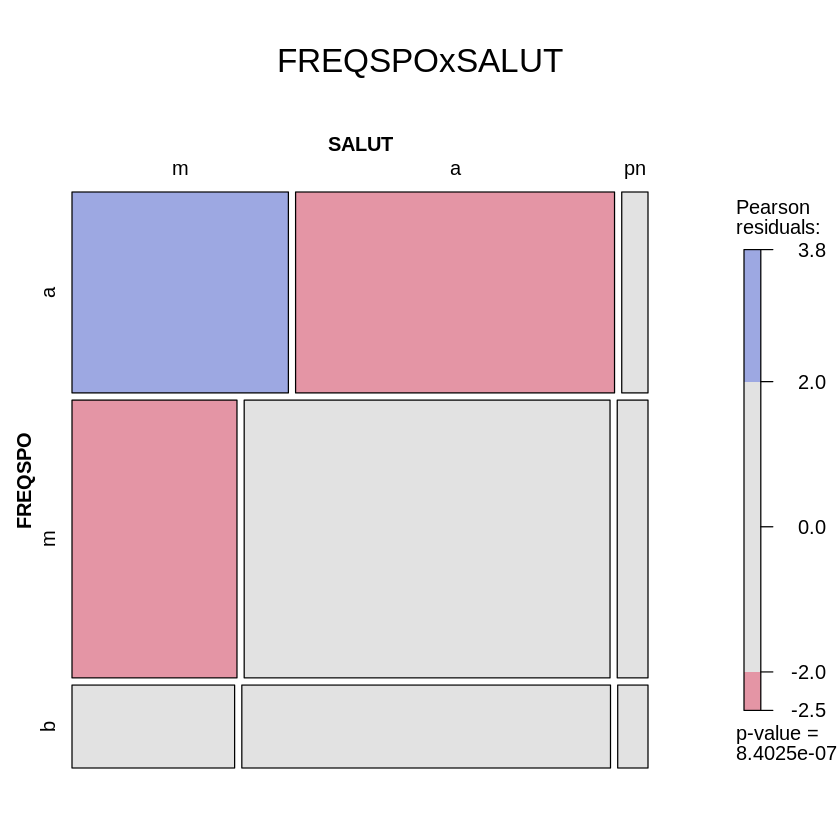

In [78]:
mosaic(~ FREQSPO + SALUT, data = AVQ18.sport, main = "FREQSPOxSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T)

#### Bivariata // Focus Ripartizione Geografica

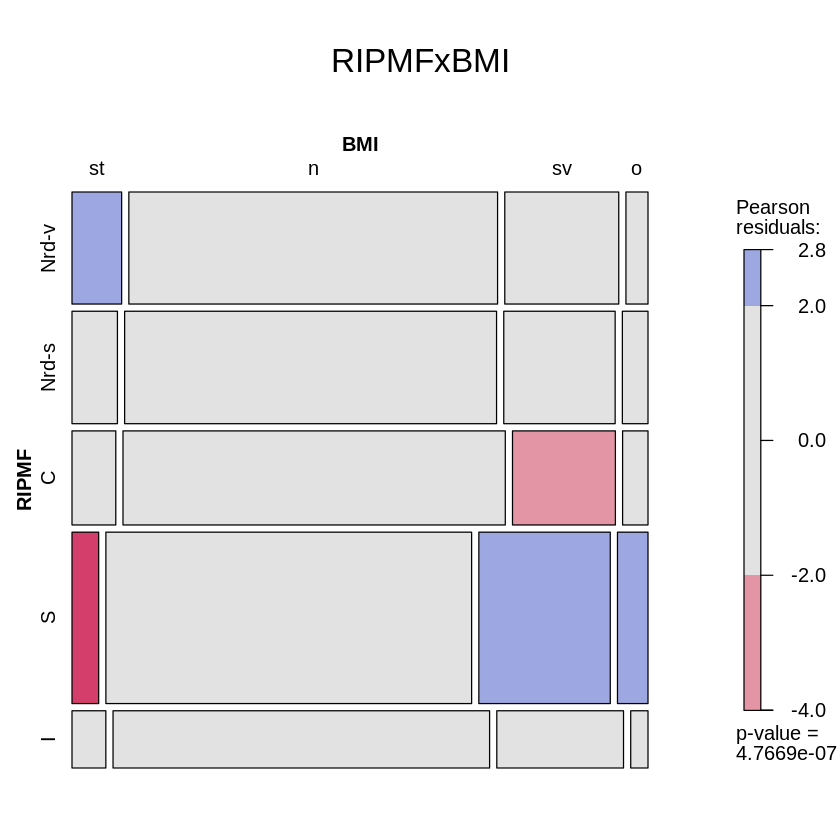

In [ ]:
mosaic(~ RIPMF + BMI, data = AVQ18.sport, main = "RIPMFxBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T)

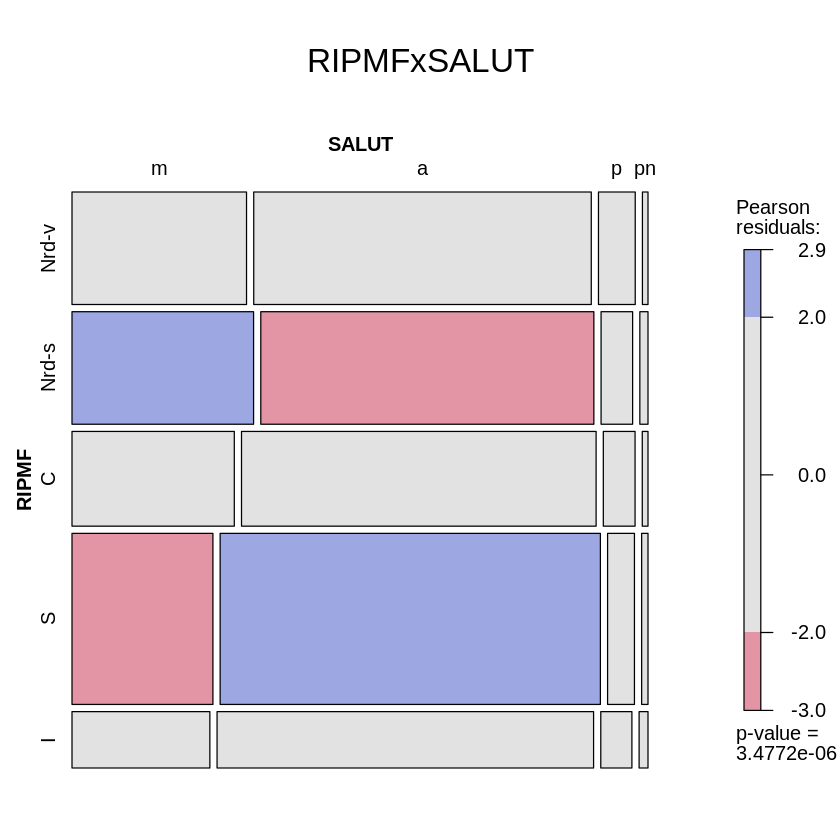

In [ ]:
mosaic(~ RIPMF + SALUT, data = AVQ18.sport, main = "RIPMFxSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T)

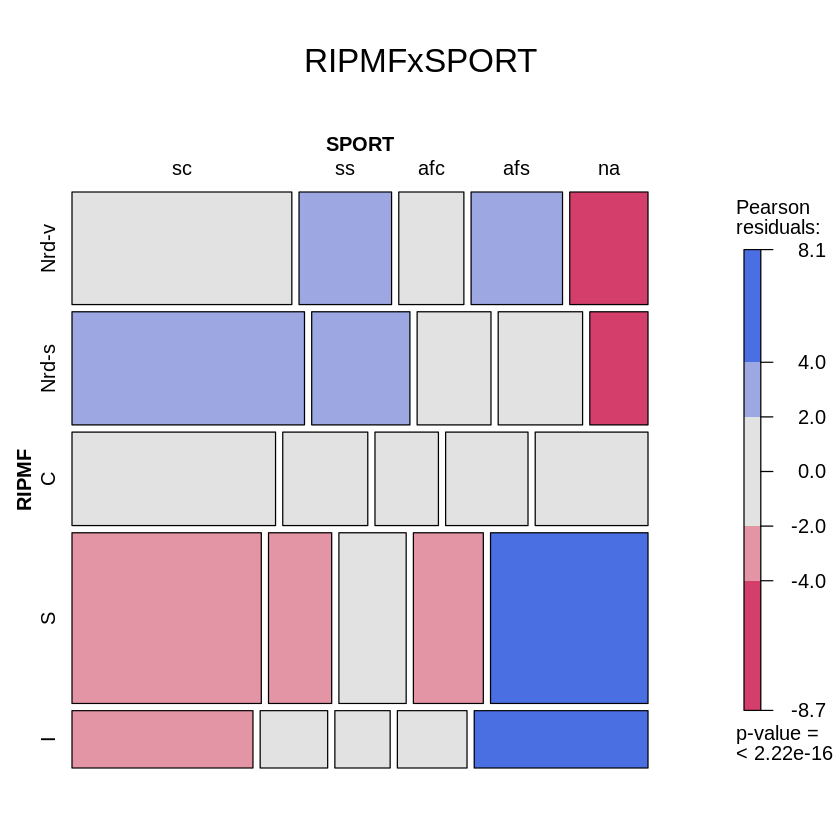

In [ ]:
mosaic(~ RIPMF + SPORT, data = AVQ18.sport, main = "RIPMFxSPORT", shade = TRUE, legend = TRUE,abbreviate_labs = T)

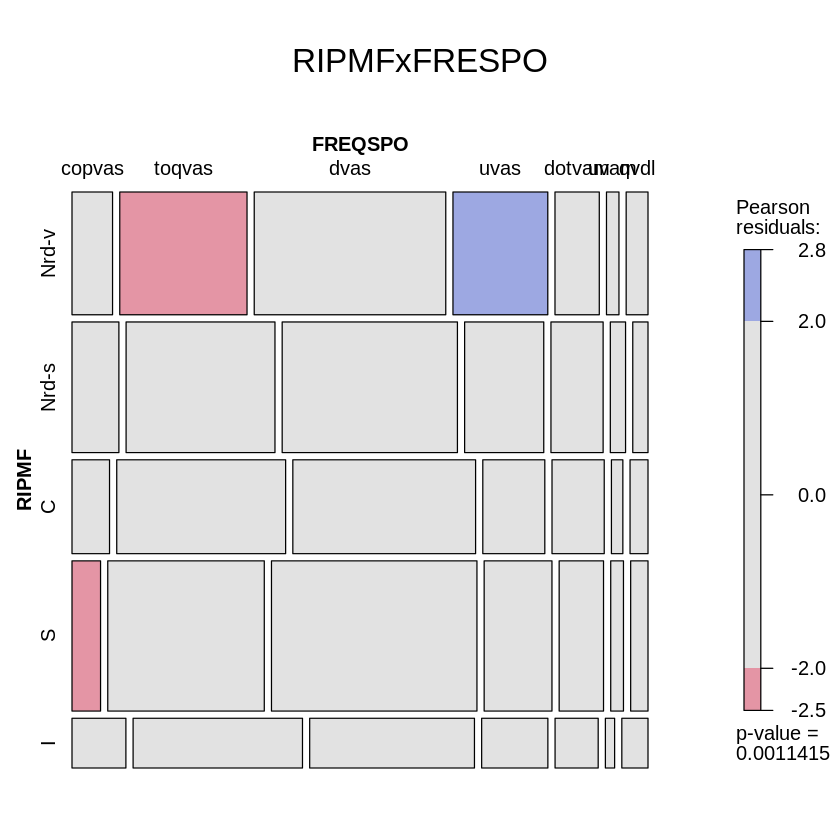

In [ ]:
mosaic(~ RIPMF + FREQSPO, data = AVQ18.sport, main = "RIPMFxFRESPO", shade = TRUE, legend = TRUE,abbreviate_labs = T)

#### Bivariata // Focus Risorse Economiche

In [46]:
table(AVQ18.sport$RISEC,AVQ18.sport$BMI)

                             
                              sottopeso normopeso sovrappeso obeso
  ottime                              7        67         21     3
  adeguate                          303      2940        921   181
  scarse                            184      1644        534   125
  assolutamente insufficienti        22       261         91    28

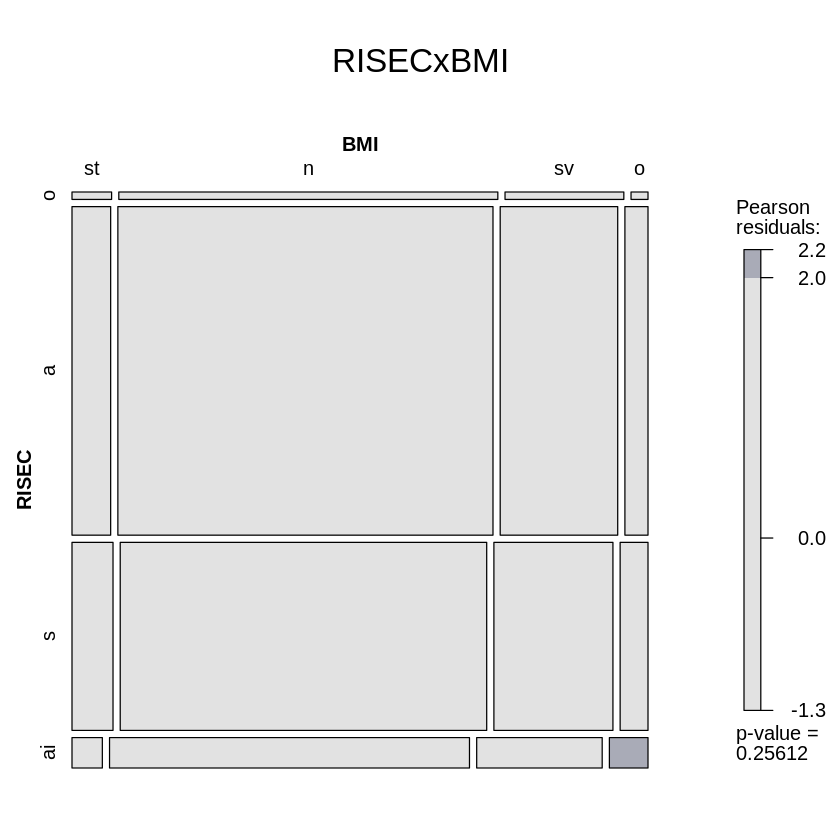

In [ ]:
mosaic(~ RISEC + BMI, data = AVQ18.sport, main = "RISECxBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T)

In [83]:
table(AVQ18.sport$RISEC,AVQ18.sport$SALUT)

                             
                              molto abbastanza poco/per niente
  ottime                         47         47               3
  adeguate                     1286       2784             223
  scarse                        651       1576             218
  assolutamente insufficienti    98        248              50

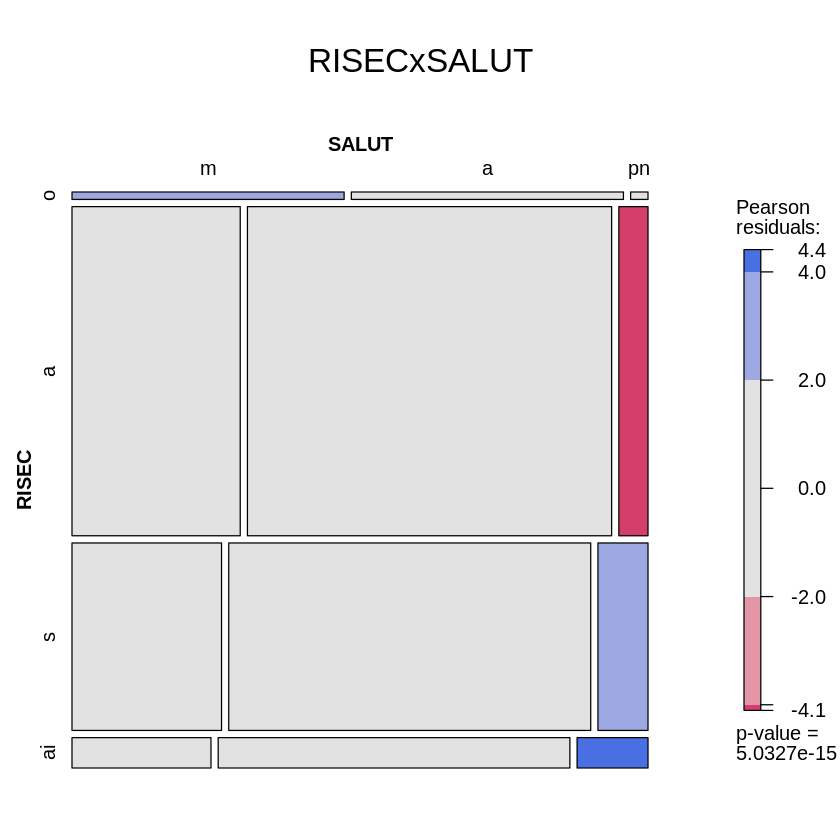

In [84]:
mosaic(~ RISEC + SALUT, data = AVQ18.sport, main = "RISECxSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T)

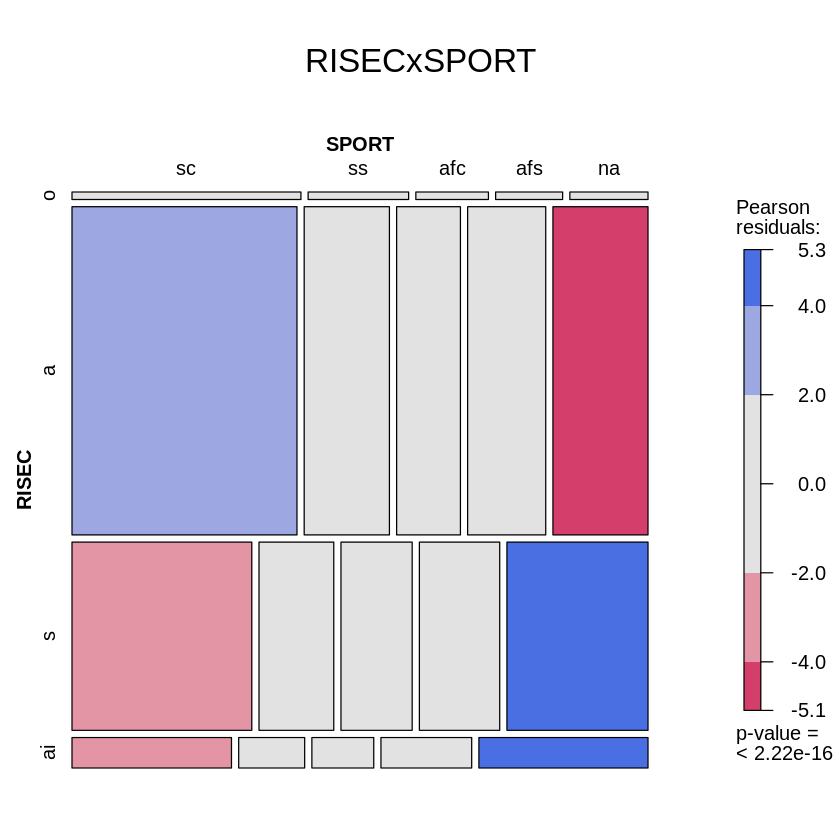

In [85]:
mosaic(~ RISEC + SPORT, data = AVQ18.sport, main = "RISECxSPORT", shade = TRUE, legend = TRUE,abbreviate_labs = T)

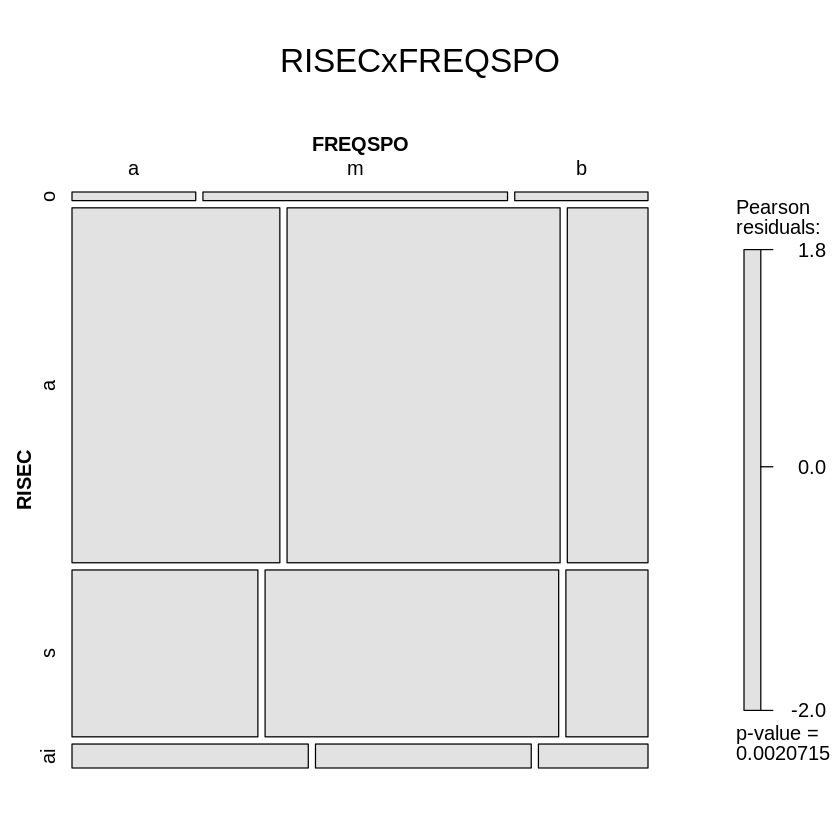

In [86]:
mosaic(~ RISEC + FREQSPO, data = AVQ18.sport, main = "RISECxFREQSPO", shade = TRUE, legend = TRUE,abbreviate_labs = T)

#### Bivariata // Focus Istruzione

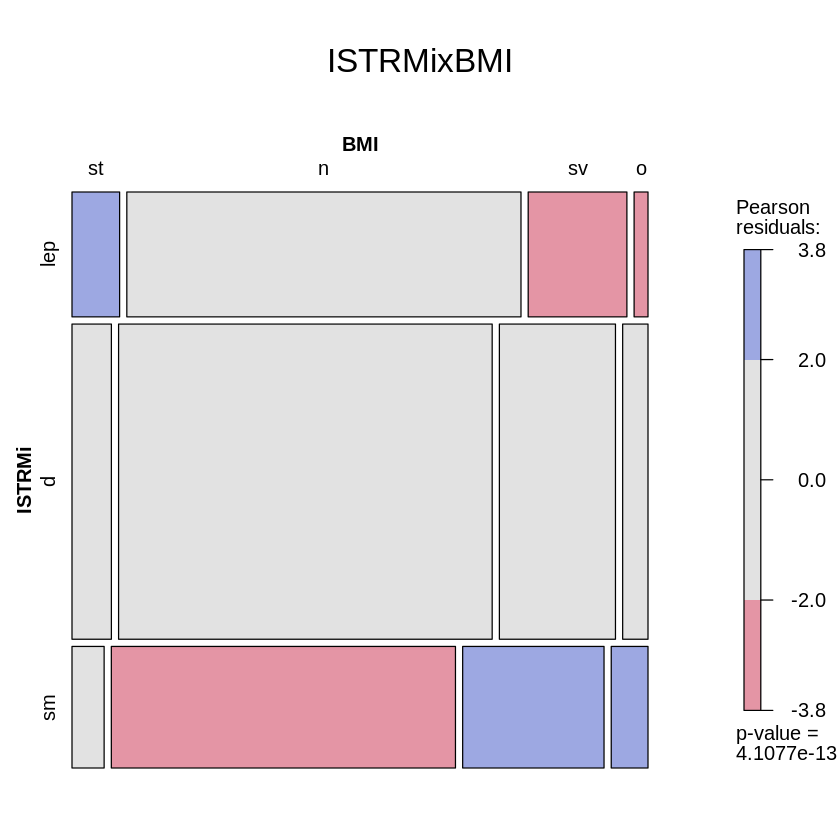

In [44]:
mosaic(~ ISTRMi + BMI, data = AVQ18.sport, main = "ISTRMixBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T)

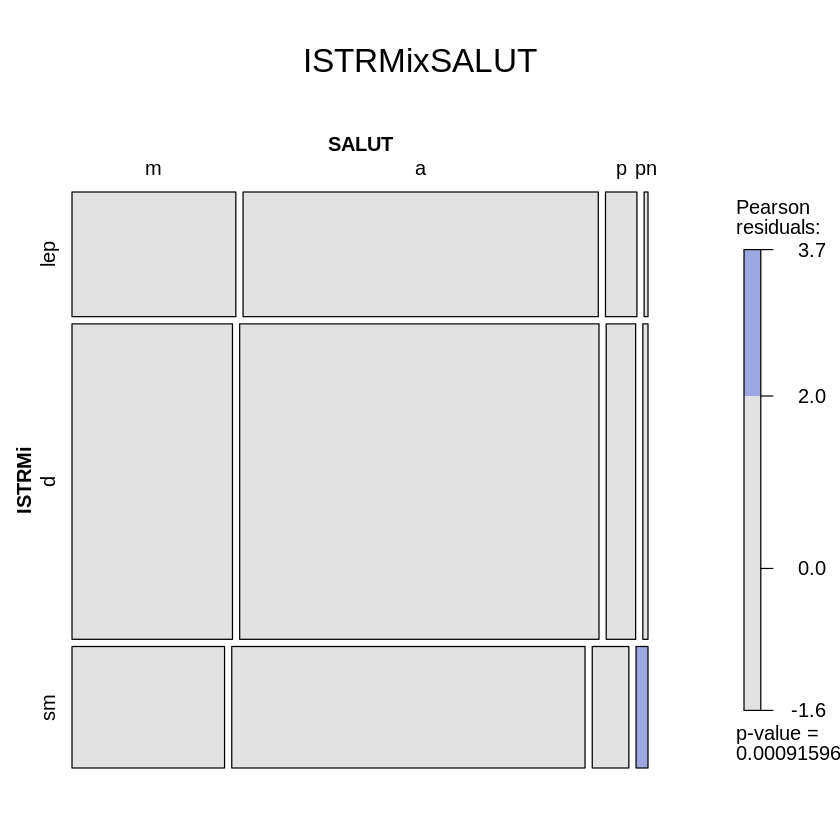

In [32]:
mosaic(~ ISTRMi + SALUT, data = AVQ18.sport, main = "ISTRMixSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T)

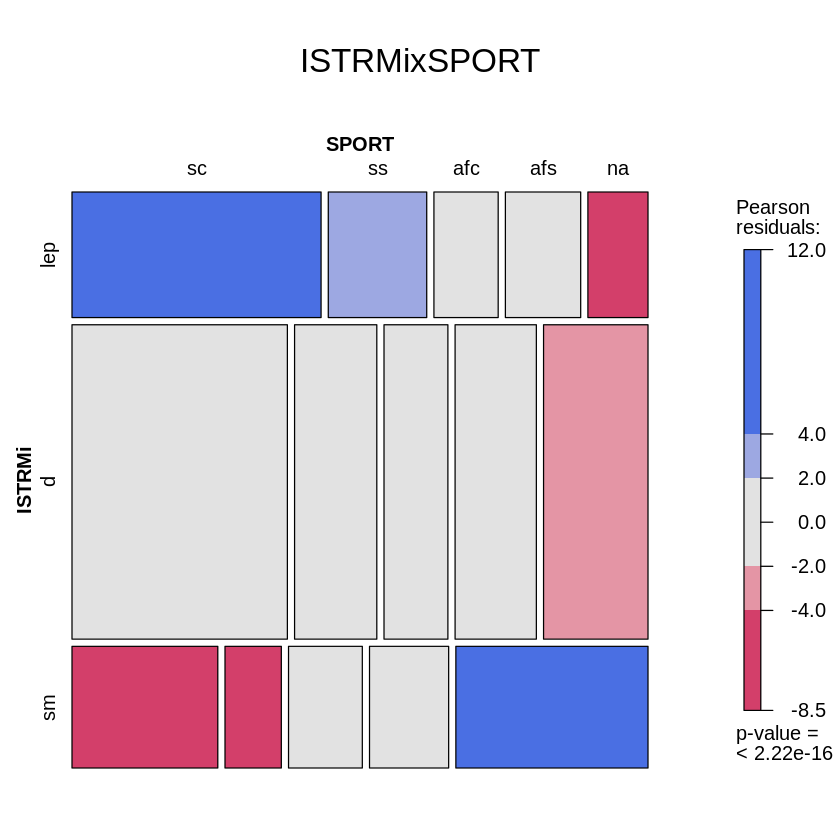

In [33]:
mosaic(~ ISTRMi + SPORT, data = AVQ18.sport, main = "ISTRMixSPORT", shade = TRUE, legend = TRUE,abbreviate_labs = T)

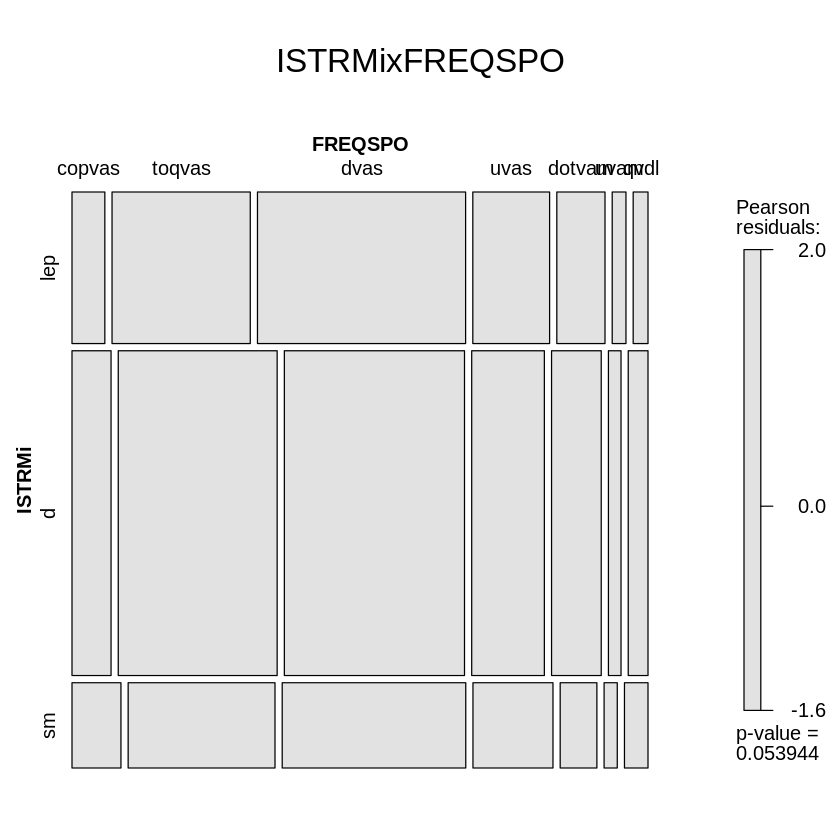

In [34]:
mosaic(~ ISTRMi + FREQSPO, data = AVQ18.sport, main = "ISTRMixFREQSPO", shade = TRUE, legend = TRUE,abbreviate_labs = T)

#### Bivariata // Focus relazione tra variabili socio-economiche

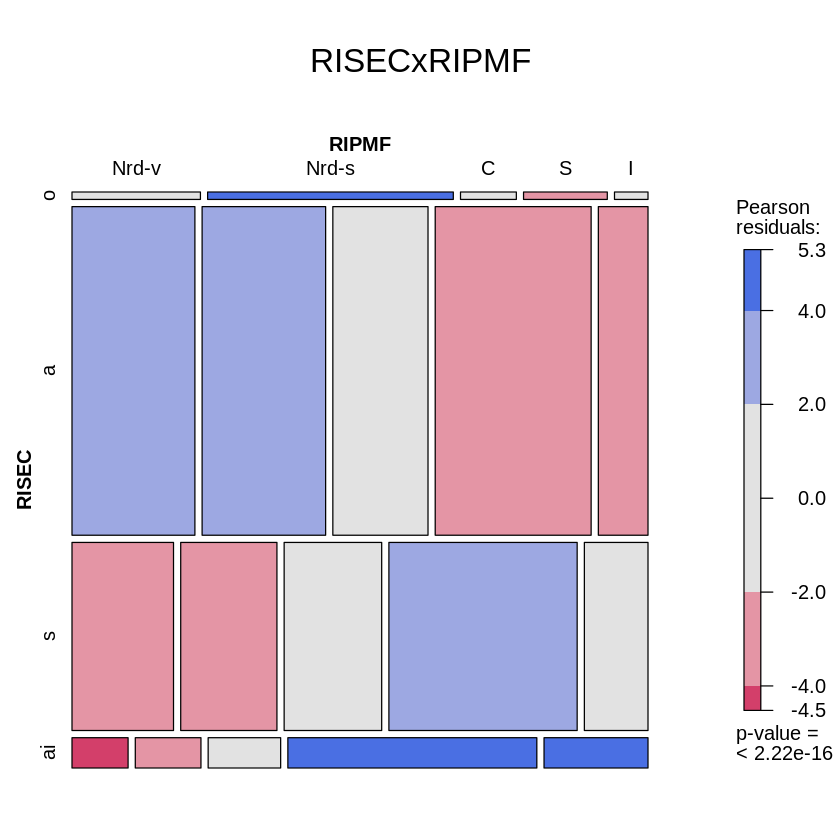

In [ ]:
mosaic(~ RISEC + RIPMF, data = AVQ18.sport, main = "RISECxRIPMF", shade = TRUE, legend = TRUE,abbreviate_labs = T)

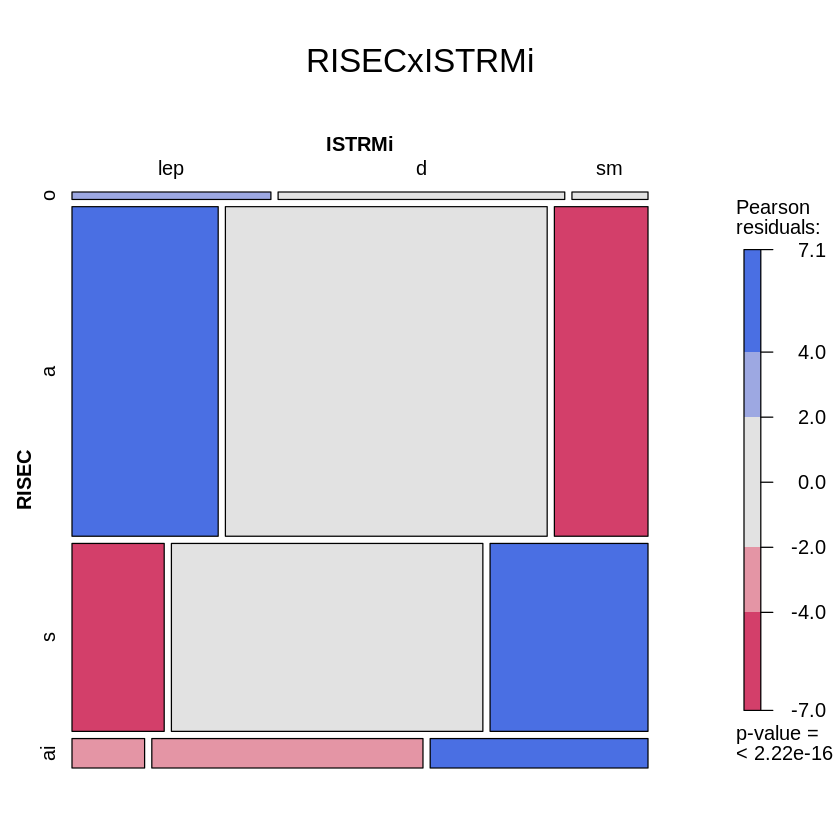

In [48]:
mosaic(~ RISEC + ISTRMi, data = AVQ18.sport, main = "RISECxISTRMi", shade = TRUE, legend = TRUE,abbreviate_labs = T)

#### Bivariata // Focus Sesso

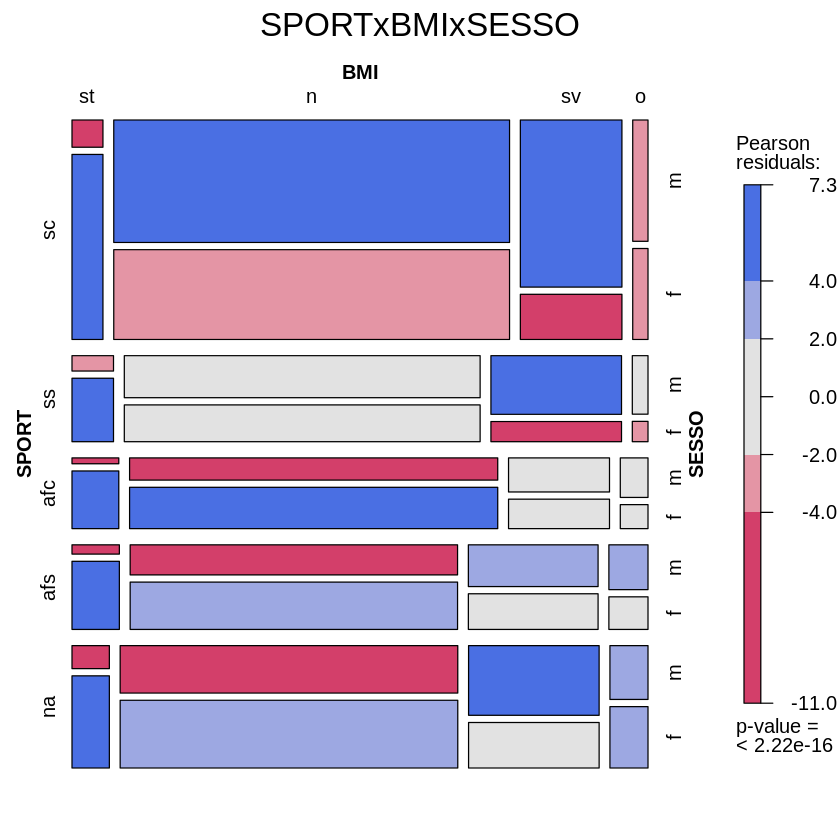

In [35]:
mosaic(~ SPORT + BMI + SESSO, data = AVQ18.sport, main = "SPORTxBMIxSESSO", shade = TRUE, legend = TRUE,abbreviate_labs = T)

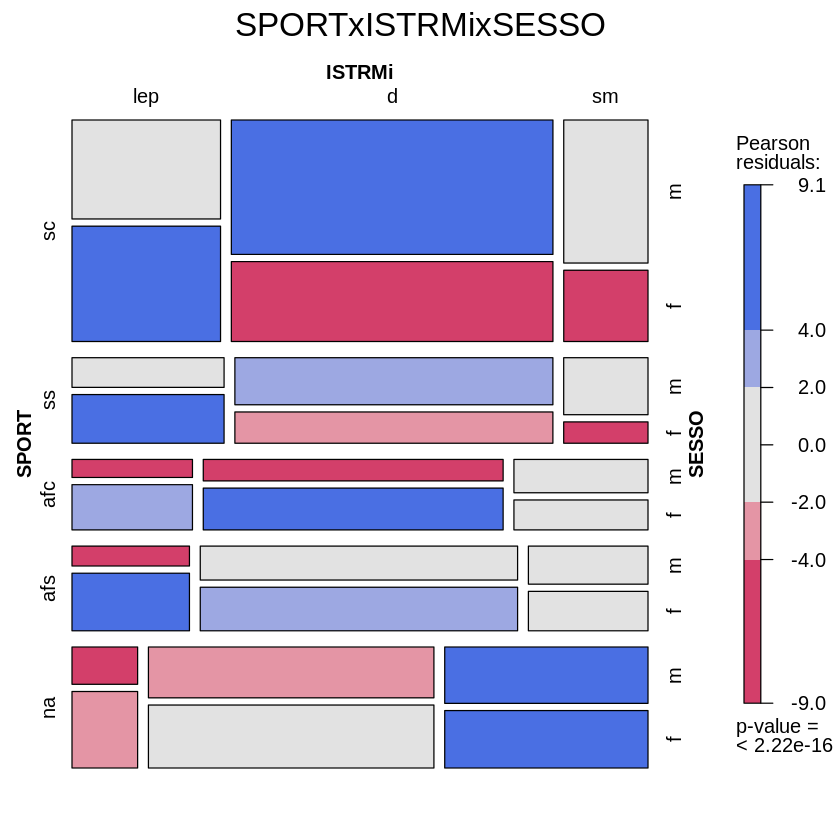

In [36]:
mosaic(~ SPORT + ISTRMi + SESSO, data = AVQ18.sport, main = "SPORTxISTRMixSESSO", shade = TRUE, legend = TRUE,abbreviate_labs = T)

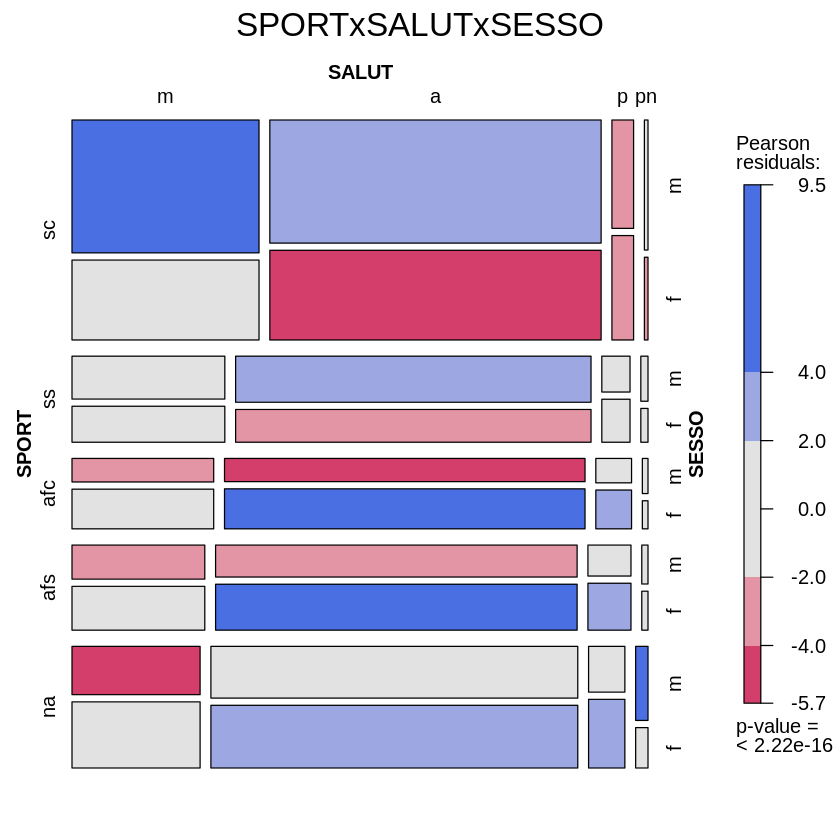

In [37]:
mosaic(~ SPORT + SALUT + SESSO, data = AVQ18.sport, main = "SPORTxSALUTxSESSO", shade = TRUE, legend = TRUE,abbreviate_labs = T)

#### Analisi Multivariata // MCA

In [87]:
library("FactoMineR")
library("factoextra")
library("ggplot2")

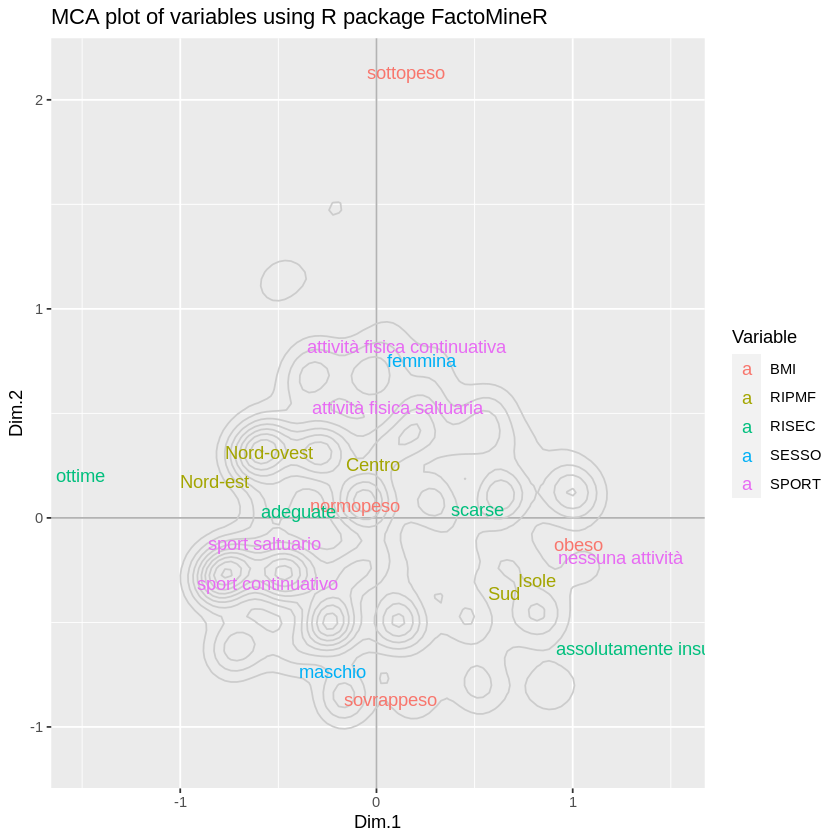

In [106]:
df <- AVQ18.sport[,c('BMI','SPORT','RISEC','RIPMF','SESSO')]
df <- na.omit(df)
# head(df)
# number of categories per variable
cats = apply(df, 2, function(x) nlevels(as.factor(x)))
#cats
# apply MCA
mca1 = MCA(df, graph = FALSE)
# list of results
#mca1
# data frame with variable coordinates
mca1_vars_df = data.frame(mca1$var$coord, Variable = rep(names(cats), cats))
# data frame with observation coordinates
mca1_obs_df = data.frame(mca1$ind$coord)
# MCA plot of observations and categories
ggplot(data = mca1_obs_df, aes(x = Dim.1, y = Dim.2)) +
  geom_hline(yintercept = 0, colour = "gray70") +
  geom_vline(xintercept = 0, colour = "gray70") +
  geom_point(colour = "gray50", alpha = 0.0) +
  geom_density2d(colour = "gray80") +
  geom_text(data = mca1_vars_df, 
            aes(x = Dim.1, y = Dim.2, 
                label = rownames(mca1_vars_df), colour = Variable)) +
  ggtitle("MCA plot of variables using R package FactoMineR") +
  scale_colour_discrete(name = "Variable")

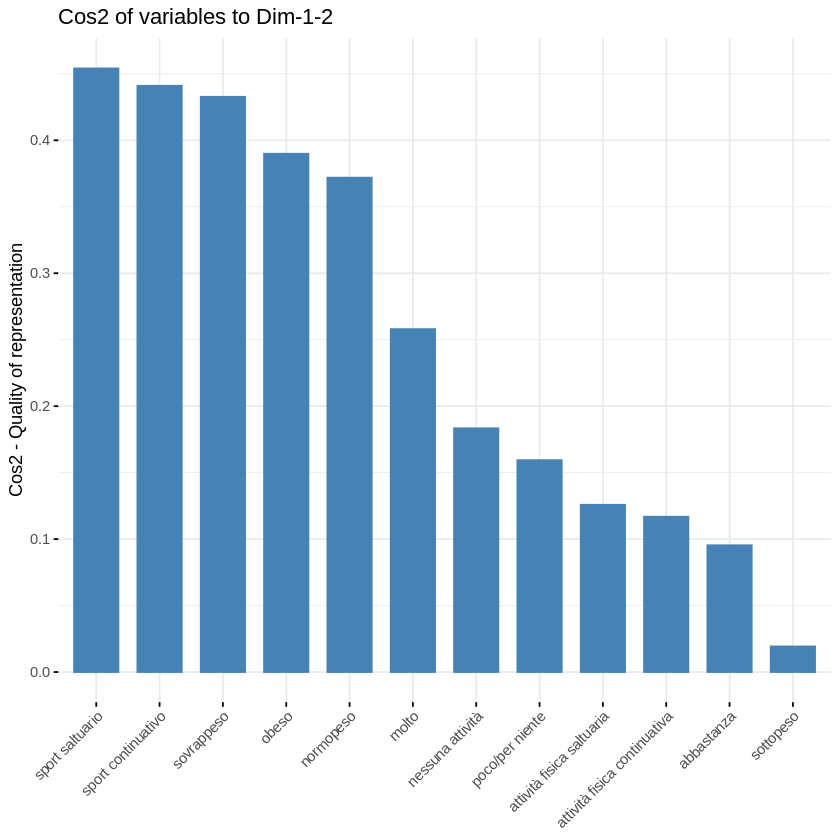

In [123]:
fviz_cos2(mca1, choice = "var", axes = 1:2)

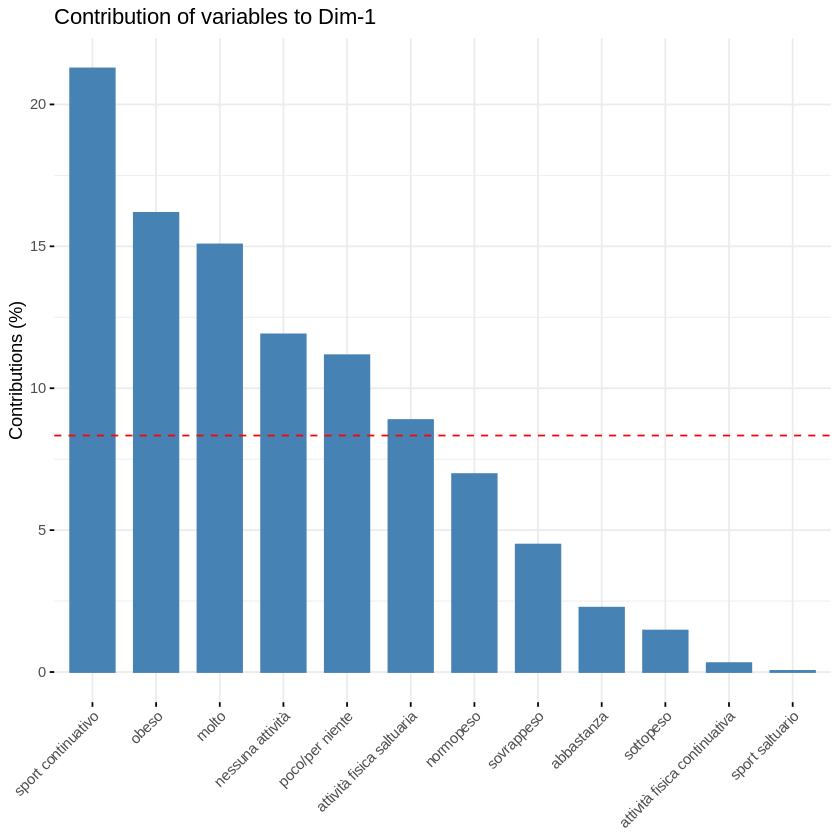

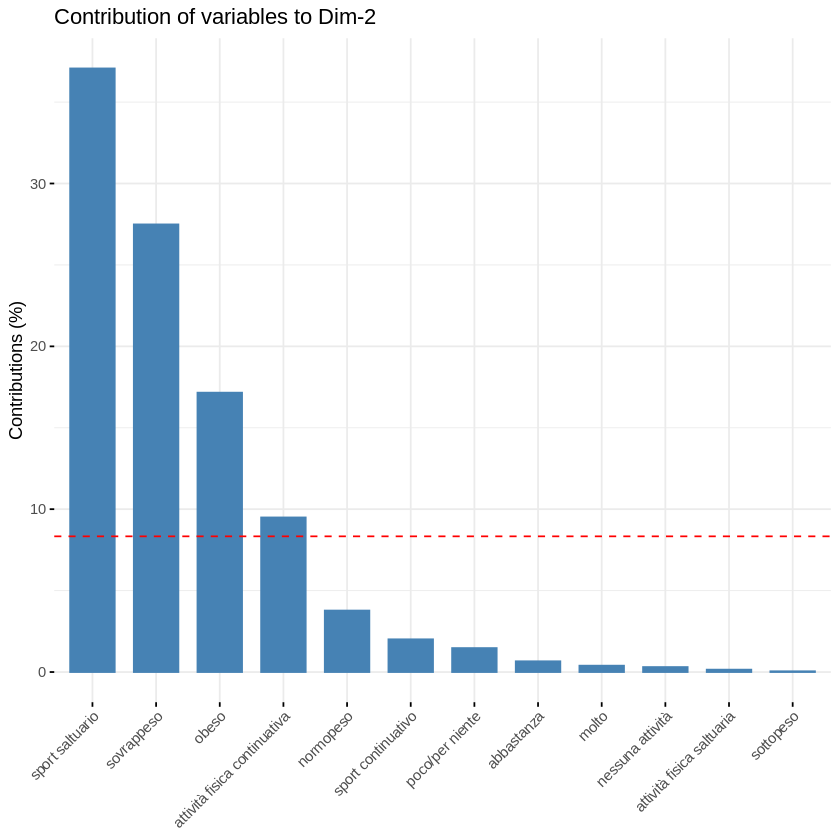

In [127]:
# Contributions of rows to dimension 1
fviz_contrib(mca1, choice = "var", axes = 1, top = 15)
# Contributions of rows to dimension 2
fviz_contrib(mca1, choice = "var", axes = 2, top = 15)

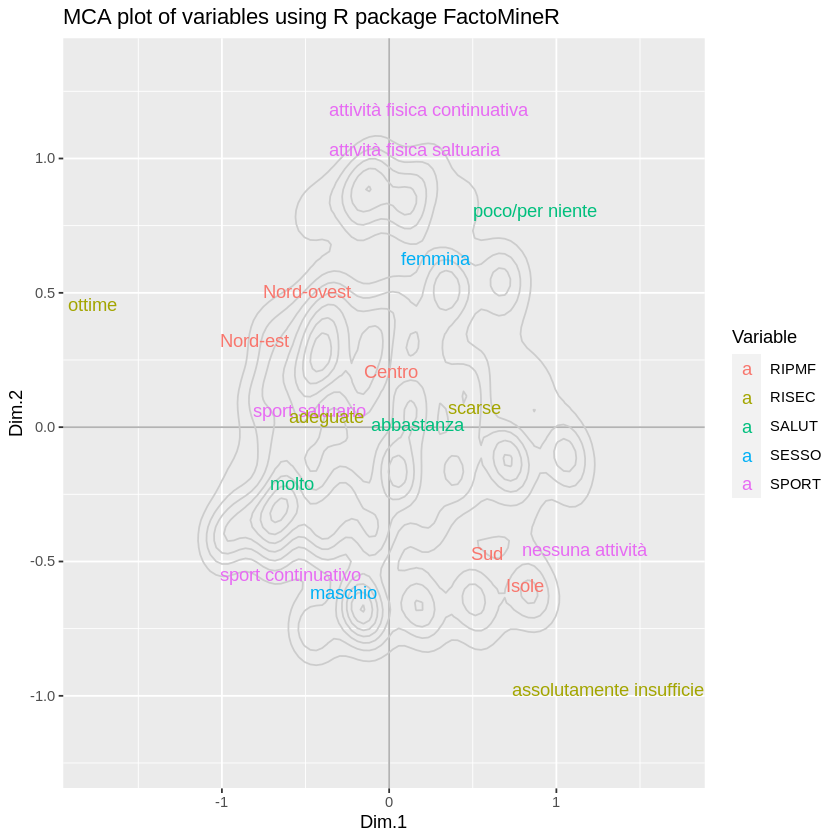

In [97]:
df <- AVQ18.sport[,c('SALUT','SPORT','RISEC','RIPMF','SESSO')]
df <- na.omit(df)
# head(df)
# number of categories per variable
cats = apply(df, 2, function(x) nlevels(as.factor(x)))
#cats
# apply MCA
mca1 = MCA(df, graph = FALSE)
# list of results
#mca1
# data frame with variable coordinates
mca1_vars_df = data.frame(mca1$var$coord, Variable = rep(names(cats), cats))
# data frame with observation coordinates
mca1_obs_df = data.frame(mca1$ind$coord)
# MCA plot of observations and categories
ggplot(data = mca1_obs_df, aes(x = Dim.1, y = Dim.2)) +
  geom_hline(yintercept = 0, colour = "gray70") +
  geom_vline(xintercept = 0, colour = "gray70") +
  geom_point(colour = "gray50", alpha = 0.0) +
  geom_density2d(colour = "gray80") +
  geom_text(data = mca1_vars_df, aes(x = Dim.1, y = Dim.2, label = rownames(mca1_vars_df), colour = Variable)) +
  ggtitle("MCA plot of variables using R package FactoMineR") +
  scale_colour_discrete(name = "Variable")

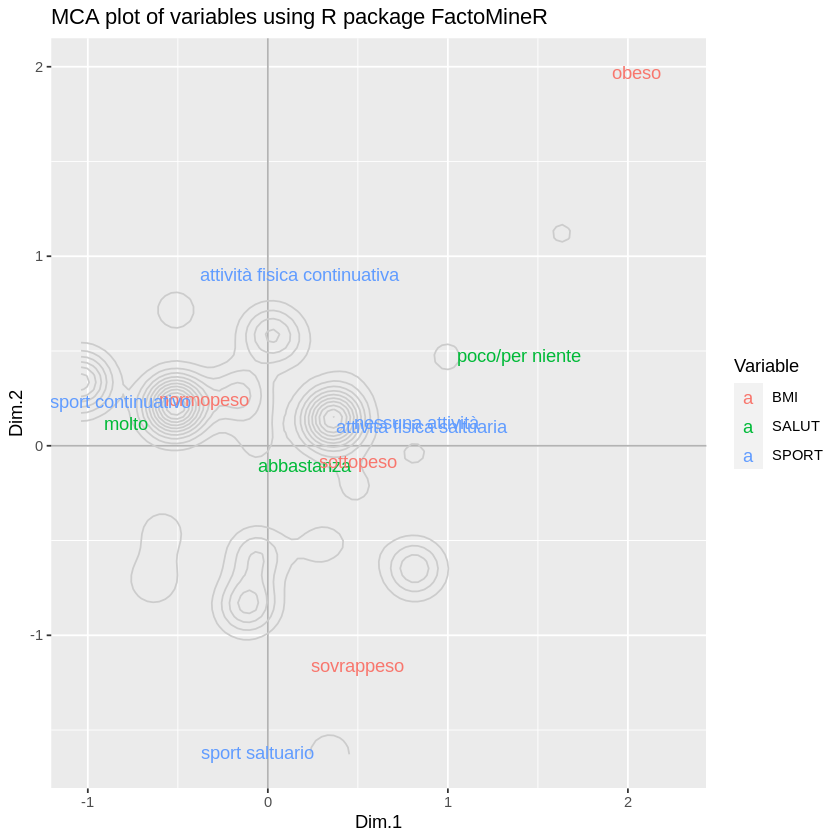

In [113]:
df <- AVQ18.sport[,c('SALUT','BMI','SPORT')]
df <- na.omit(df)
cats = apply(df, 2, function(x) nlevels(as.factor(x)))
mca1 = MCA(df, graph = FALSE)
# data frame with variable coordinates
mca1_vars_df = data.frame(mca1$var$coord, Variable = rep(names(cats), cats))
# data frame with observation coordinates
mca1_obs_df = data.frame(mca1$ind$coord)
# MCA plot of observations and categories
ggplot(data = mca1_obs_df, aes(x = Dim.1, y = Dim.2)) +
  geom_hline(yintercept = 0, colour = "gray70") +
  geom_vline(xintercept = 0, colour = "gray70") +
  geom_point(colour = "gray50", alpha = 0.0) +
  geom_density2d(colour = "gray80") +
  geom_text(data = mca1_vars_df, 
            aes(x = Dim.1, y = Dim.2, 
                label = rownames(mca1_vars_df), colour = Variable)) +
  ggtitle("MCA plot of variables using R package FactoMineR") +
  scale_colour_discrete(name = "Variable")

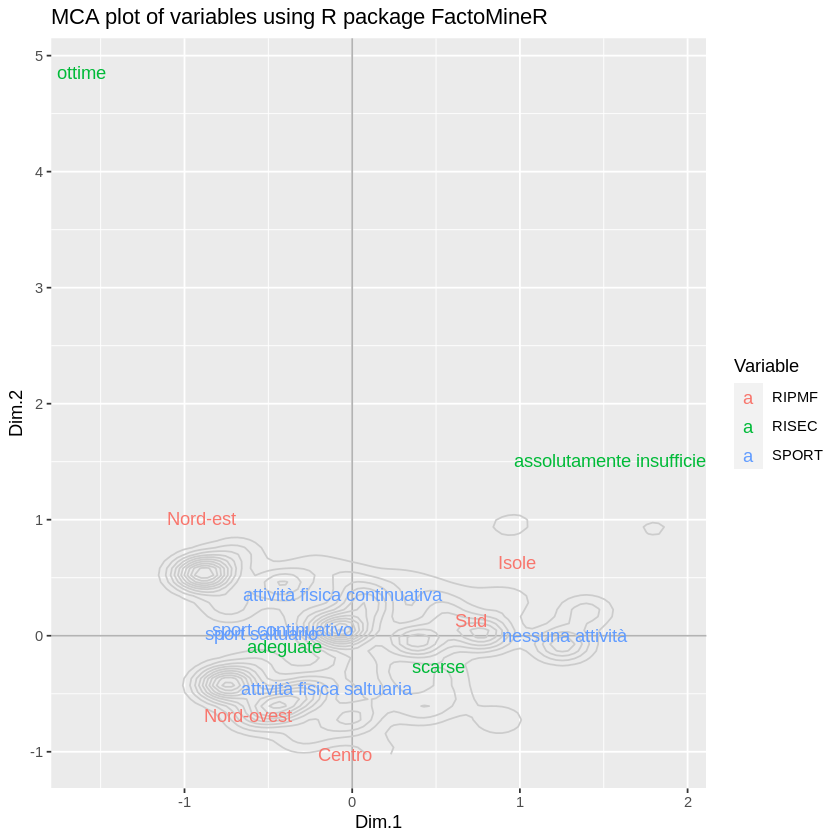

In [99]:
df <- AVQ18.sport[,c('RISEC','SPORT','RIPMF')]
df <- na.omit(df)
cats = apply(df, 2, function(x) nlevels(as.factor(x)))
mca1 = MCA(df, graph = FALSE)
# data frame with variable coordinates
mca1_vars_df = data.frame(mca1$var$coord, Variable = rep(names(cats), cats))
# data frame with observation coordinates
mca1_obs_df = data.frame(mca1$ind$coord)
# MCA plot of observations and categories
ggplot(data = mca1_obs_df, aes(x = Dim.1, y = Dim.2)) +
  geom_hline(yintercept = 0, colour = "gray70") +
  geom_vline(xintercept = 0, colour = "gray70") +
  geom_point(colour = "gray50", alpha = 0.0) +
  geom_density2d(colour = "gray80") +
  geom_text(data = mca1_vars_df, 
            aes(x = Dim.1, y = Dim.2, 
                label = rownames(mca1_vars_df), colour = Variable)) +
  ggtitle("MCA plot of variables using R package FactoMineR") +
  scale_colour_discrete(name = "Variable")

In [1]:
# MCA tra variabili socio economiche per capire contesto

In [2]:
# Vedere con cos^2 la contribuzione alle singole dimensioni res.mca$var$cos2

In [ ]:
# 'SESSO','CITTMi','STCIVMi','ISTRMi','CONDMi','RISEC', 'RIPMF',

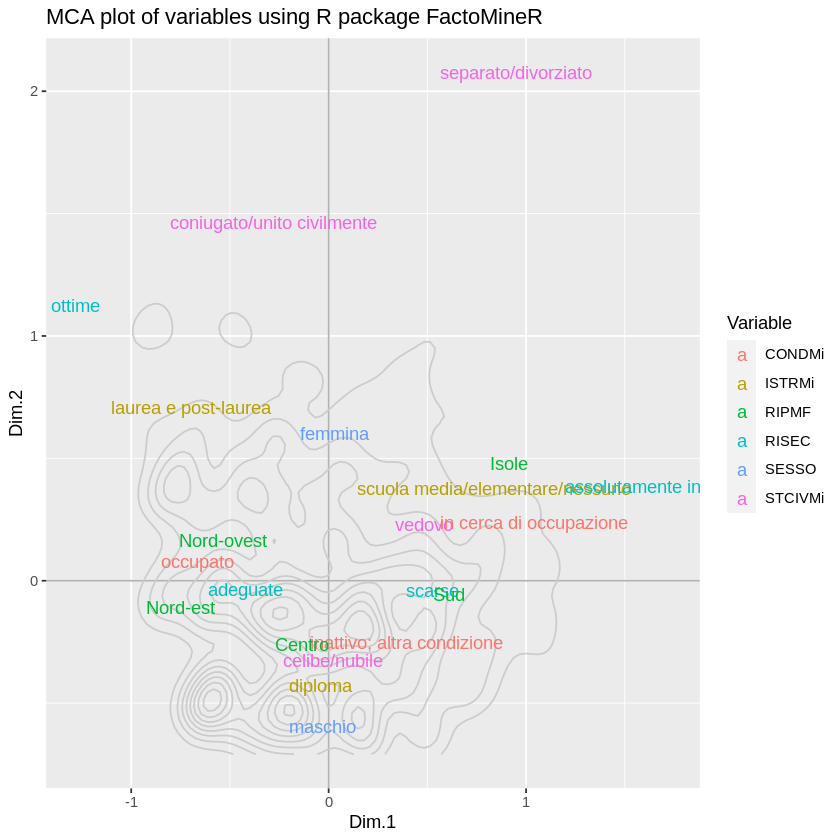

In [95]:
df <- AVQ18.sport[,c('SESSO','STCIVMi','ISTRMi','CONDMi','RISEC', 'RIPMF')]
df <- na.omit(df)
cats = apply(df, 2, function(x) nlevels(as.factor(x)))
mca1 = MCA(df, graph = FALSE)
# data frame with variable coordinates
mca1_vars_df = data.frame(mca1$var$coord, Variable = rep(names(cats), cats))
# data frame with observation coordinates
mca1_obs_df = data.frame(mca1$ind$coord)
# MCA plot of observations and categories
ggplot(data = mca1_obs_df, aes(x = Dim.1, y = Dim.2)) +
  geom_hline(yintercept = 0, colour = "gray70") +
  geom_vline(xintercept = 0, colour = "gray70") +
  geom_point(colour = "gray50", alpha = 0.0) +
  geom_density2d(colour = "gray80") +
  geom_text(data = mca1_vars_df, 
            aes(x = Dim.1, y = Dim.2, 
                label = rownames(mca1_vars_df), colour = Variable)) +
  ggtitle("MCA plot of variables using R package FactoMineR") +
  scale_colour_discrete(name = "Variable")